In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 102kB 2.3MB/s 


In [ ]:
pip install catboost

     |████████████████████████████████| 66.2MB 55kB/s 


##Importing all the libraries that are required

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm , skew, boxcox, boxcox_normmax, pearsonr
from scipy.special import boxcox1p
from scipy.stats import johnsonsu , uniform, truncnorm, randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.svm import  SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from skopt import BayesSearchCV 
import warnings

warnings.filterwarnings('ignore', message='`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).warnings.warn(msg, FutureWarning)')
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')
warnings.filterwarnings('ignore',message = 'reg:linear is now deprecated in favor of reg:squarederror.')

Importing both test and train datasets

In [ ]:
#Reading Dataset

dataset_train = pd.read_csv('House_train.csv')
dataset_test = pd.read_csv('House_test.csv')

dataset_train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
#Shape of the dataset
print('Train shape:',dataset_train.shape)
print('Test shape:',dataset_test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


##Numerical and Categorical Features

Dividing the features into categorical and Numerical


In [ ]:
num_features = dataset_train.select_dtypes(include=[np.number])
cat_features = dataset_train.select_dtypes(include=[np.object])

SalePrice is the target variable and its important to know about it. How it varies and what is the relationship between Target variable and other independent variables.

In [ ]:
unique = pd.DataFrame(data = num_features.nunique(),columns=['NUnique'])
unique = unique.sort_values(by = "NUnique",ascending=True)
unique.head(20)

NUnique
BsmtHalfBath        3
HalfBath            3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76

###Discrete Features


These are the feauters that have numbers but they represent quality , condition and also number of rooms and classes


*   'BsmtHalfBath' :- Total number of Basement Half Bathrooms 

*   'HalfBath' :- Total number of Half Bathrooms
*   'FullBath' :- Total number of Full Bathrooms
*   'BsmtFullBath' :- Total number of Basement Full Bathrooms

*   'Fireplaces' :- For the presence(1) or absence(0) of the Fireplaces in the hose



*  'KitchenAbvGr' :- Total number of Kitchens above the ground

*  'GarageCars' :- How many cars can fit in Garage
                     
*   'BedroomAbvGr' :- Total number of Bedrooms above ground.


*   'OverallCond' :- Overall condition of the House
       
      *   10	Very Excellent 

      *     9	Excellent
       
      *   8	Very Good
      
      *    7	Good
      
      *    6	Above Average	
      
      *   5	Average
      
      *    4	Below Average	
      
      *   3	Fair
       
      *   2	Poor
       
      *   1	Very Poor



     

*   'OverallQual' :-  Rates the overall material and finish of the house
      * 10	Very Excellent
      *  9	Excellent
      * 8	Very Good
      * 7	Good
      * 6	Above Average
      * 5	Average
      * 4	Below Average
      * 3	Fair
      * 2	Poor
      * 1	Very Poor


*   'MoSold' :- Month the House was sold


*   'TotRmsAbvGrd' :- Total Rooms above ground

*  'MSSubClass' :-Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

*   '3SsnPorch' :-Three season porch area in square feet

                     
*   'MiscVal' :- $Value of miscellaneous feature





In [ ]:
Discrete_Features = ['BsmtHalfBath','HalfBath','FullBath','BsmtFullBath','Fireplaces','KitchenAbvGr','GarageCars',
                     'BedroomAbvGr','OverallCond','OverallQual','MoSold','TotRmsAbvGrd','MSSubClass','3SsnPorch',
                     'MiscVal']
num_features[Discrete_Features].head()

BsmtHalfBath  HalfBath  FullBath  ...  MSSubClass  3SsnPorch  MiscVal
0             0         1         2  ...          60          0        0
1             1         0         2  ...          20          0        0
2             0         1         2  ...          60          0        0
3             0         0         1  ...          70          0        0
4             0         1         2  ...          60          0        0

[5 rows x 15 columns]

Now lets see how the discrete features are varying with SalePrice

In [ ]:
dataset_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text major ticklabel objects>)

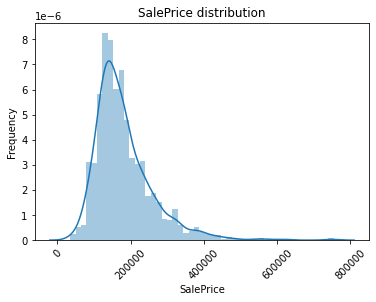

In [ ]:
sns.distplot(dataset_train['SalePrice']);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.xticks(rotation=45)

Now lets see how these Discrete Features vary with SalePrice, and we are comparing with its median of each category

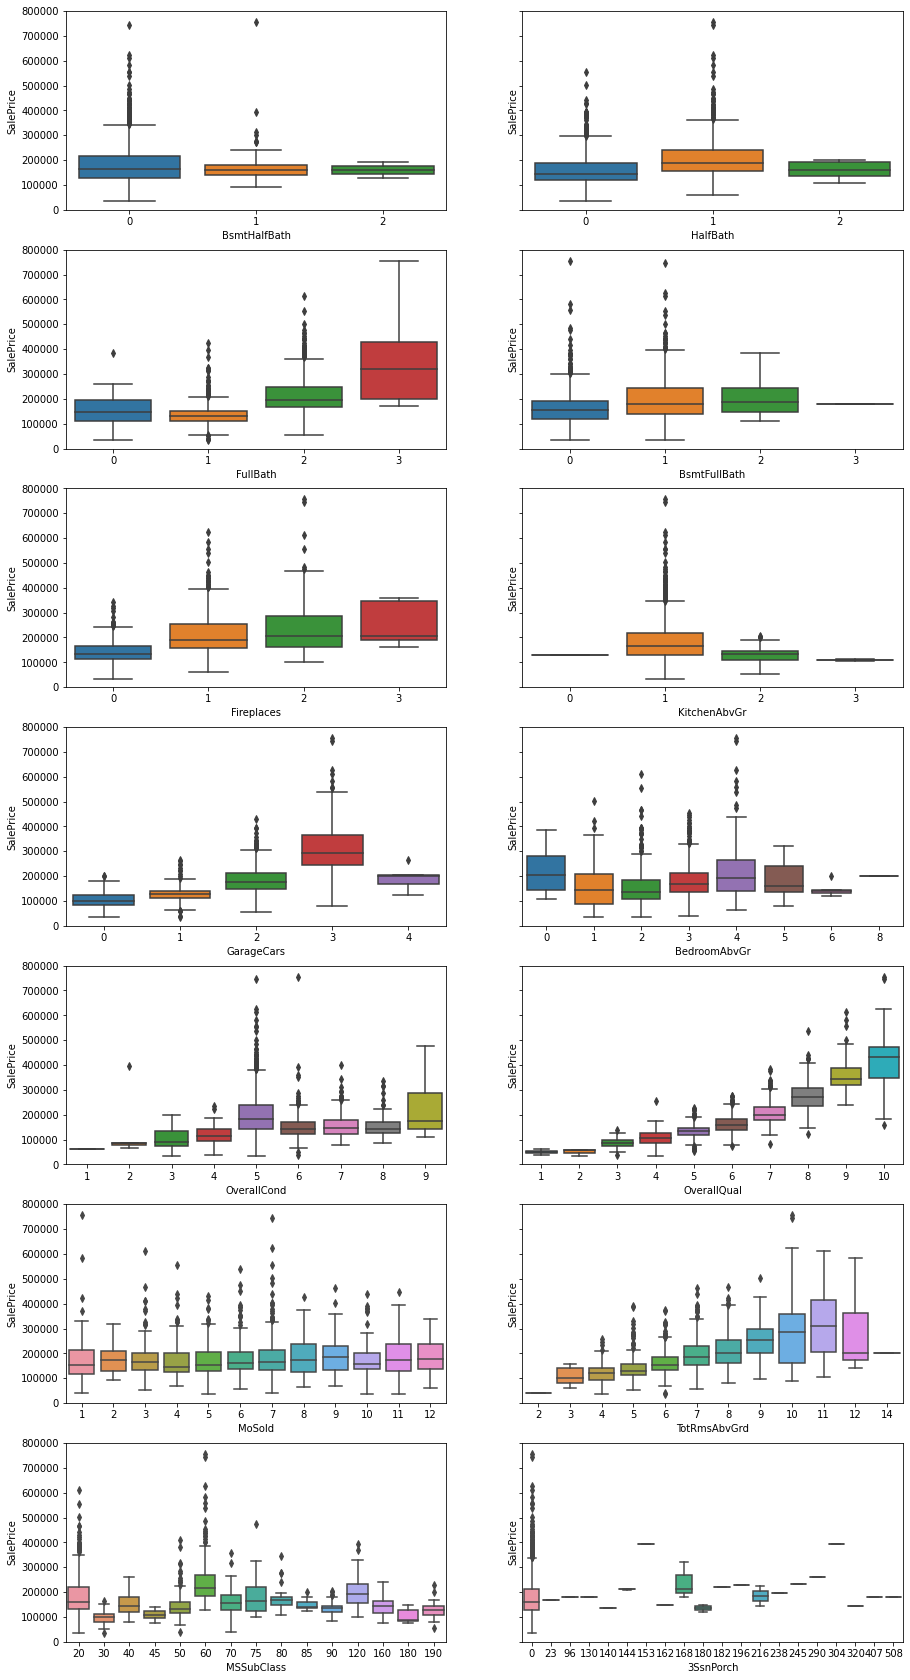

In [ ]:
l=0
m=0
f, axes = plt.subplots(7,2,sharey=True,figsize=(15, 30))
for i in range(0,14):
  fig = sns.boxplot(x=dataset_train[Discrete_Features[i]], y="SalePrice", data=dataset_train, ax=axes[m,l])
  fig.axis(ymin=0, ymax=800000)
  if l<1: l=l+1
  else: l=0;m=m+1

Regardless of "Basement_Half_Bathrooms" the "SalePrice" remain constant

The presence of the "Half_Bathroom" in the house will slightly increase the "SalePrice"

Presence of 3 "Full_Bathrooms" will have highest "SalePrice", 300 thousand dollars

Presence of a "Basement_Full_Bath" will slightly increase the "SalePrice", approximately 25,000 $

Presence of "FirePlaces" will definetly increase the "SalePrice" of the house.

Presence of a "Garage" increase the "SalePrice" and also as the "Garage_Area" increases the "SalePrice" but only upto an extent.

As the "Overall_Quality" increases the "SalePrice" of the house increases exponentially.

As the "Total_Rooms_Above_Ground" icreases the "SalePrice" increases linearly upto 11 rooms and then falls.



A new variable like "Total_Bath" could be created from other "BathRoom" variables

###Continous Features

Now lets see how the continous features are varying with SalePrice

In [ ]:
Continous_Features = ['LotArea','','BsmtUnfSF','1stFlrSF','TotalBsmtSF','SalePrice','BsmtFinSF1','GarageArea',
                      '2ndFlrSF','MasVnrArea','WoodDeckSF','OpenPorchSF','BsmtFinSF2','EnclosedPorch','LotFrontage',
                      'ScreenPorch','LowQualFinSF','PoolArea']
num_features[Continous_Features].head()

LotArea  GrLivArea  BsmtUnfSF  ...  ScreenPorch  LowQualFinSF  PoolArea
0     8450       1710        150  ...            0             0         0
1     9600       1262        284  ...            0             0         0
2    11250       1786        434  ...            0             0         0
3     9550       1717        540  ...            0             0         0
4    14260       2198        490  ...            0             0         0

[5 rows x 18 columns]

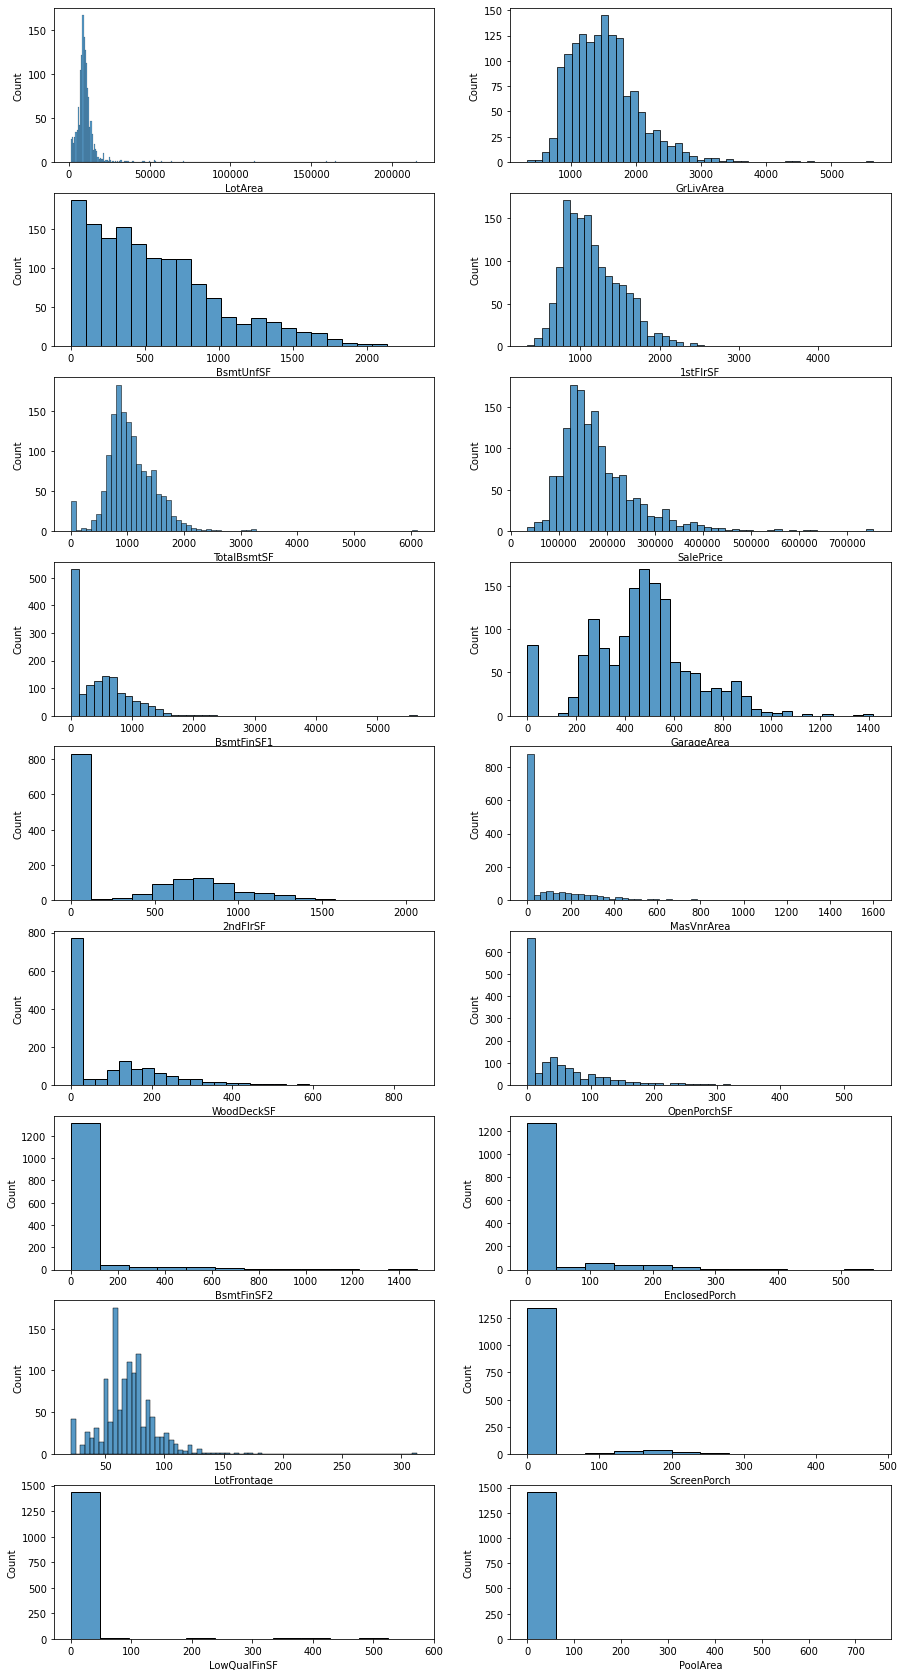

In [ ]:
l=0
m=0
f, axes = plt.subplots(9,2,sharey=False,figsize=(15, 30))
for i in range(0,18):
  fig = sns.histplot(dataset_train[Continous_Features[i]], ax=axes[m,l])
  if l<1: l=l+1
  else: l=0;m=m+1

A new "All_Porch" can be created from all the porch variables, since most of the houses dont have porch, they can be combined

"TotalSF" variable can be created by adding all the surface area variables, most have the houses dont have 2nd floor(so no 2nd floor Surface area)

###Year Features

Now lets see how the year features are varying with SalePrice

In [ ]:
Year_Feature = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
num_features[Year_Feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

Rather than just comparing year variables with SalePrice , lets compare the age of the house at the time of house is sold with the SalePrice

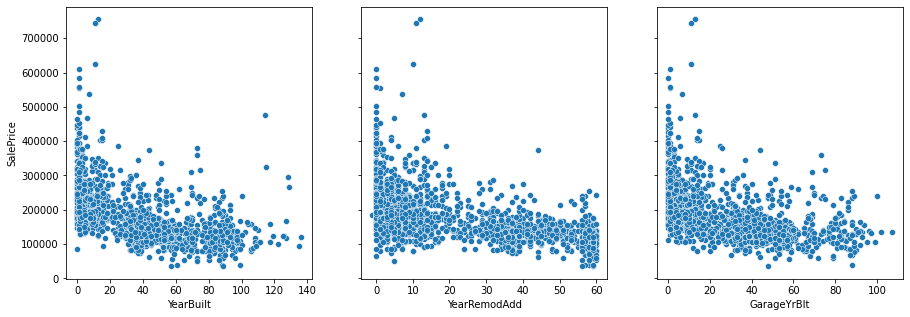

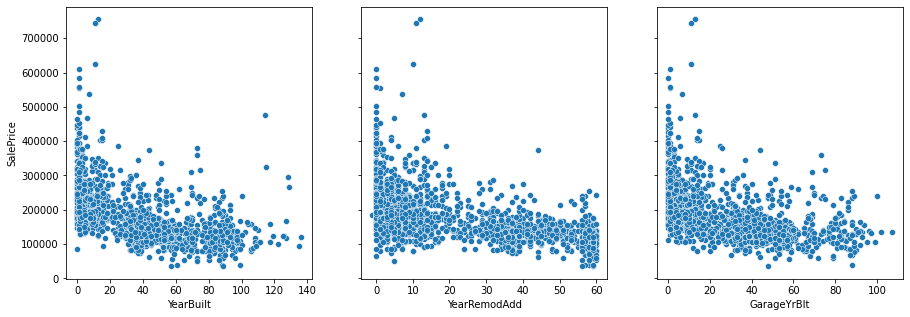

In [ ]:
l=0

f, axes = plt.subplots(1,3,sharey=True,figsize=(15, 5))
for f in Year_Feature:
    if f!='YrSold':
        data=dataset_train.copy()
        data[f]=data['YrSold']-data[f]
        fig = sns.scatterplot(x=data[f], y=data["SalePrice"], data=data, ax=axes[l])
        if l<2: l=l+1
  

If the age of the house is less i.e house is newly built then its price is high

###Categorical Features

Now lets see how the categorical features are varying with SalePrice

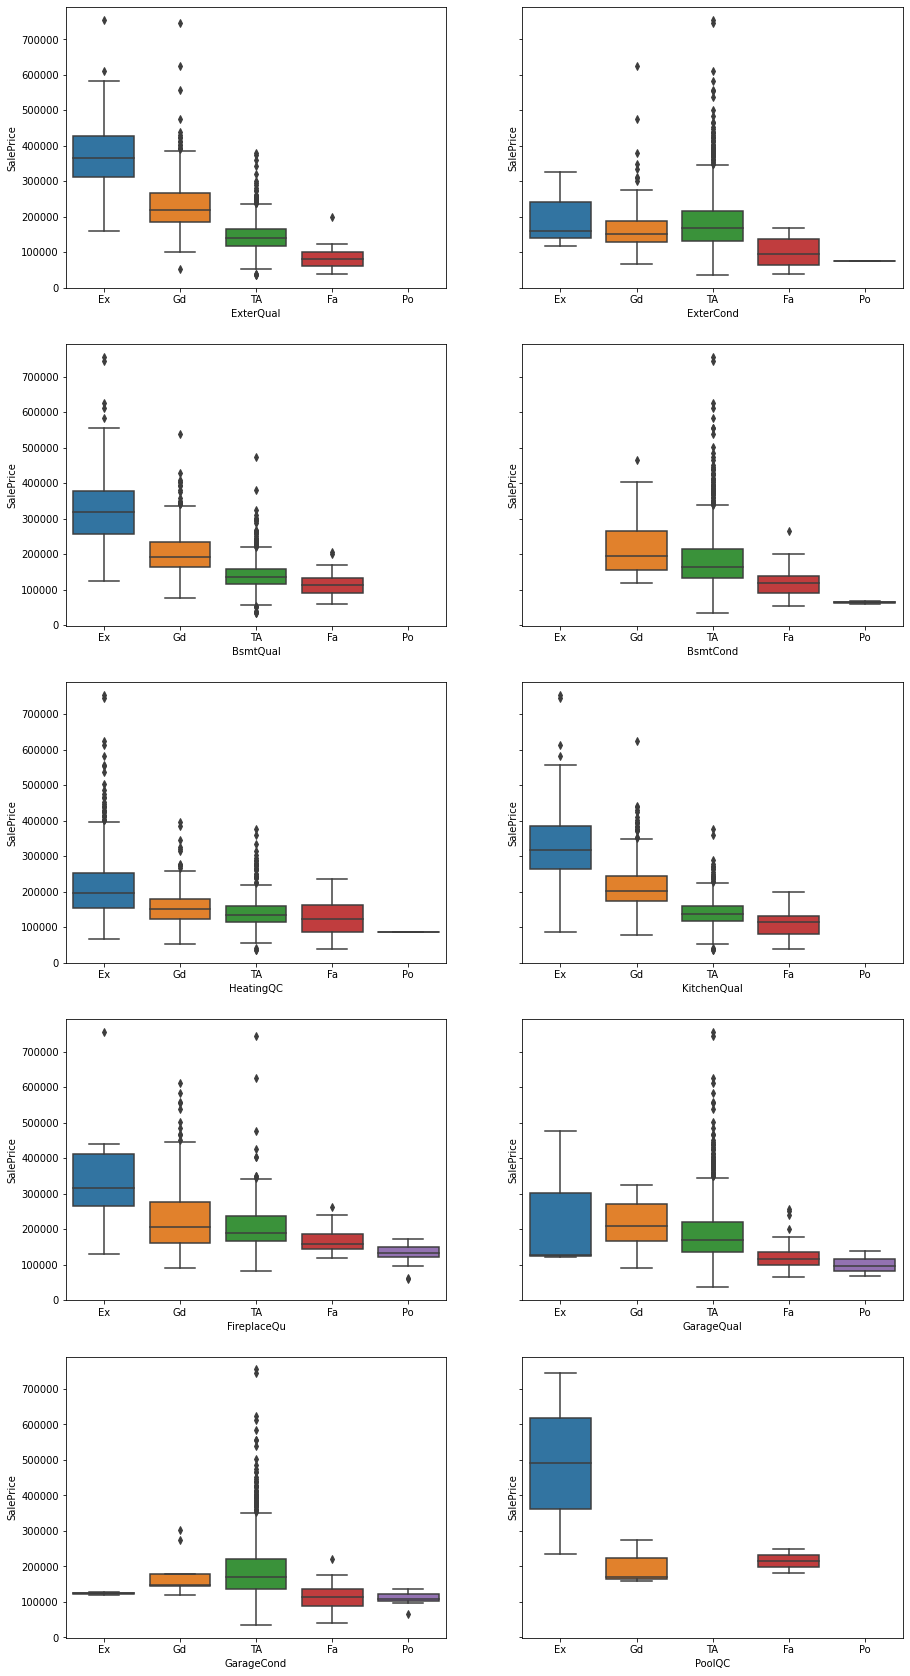

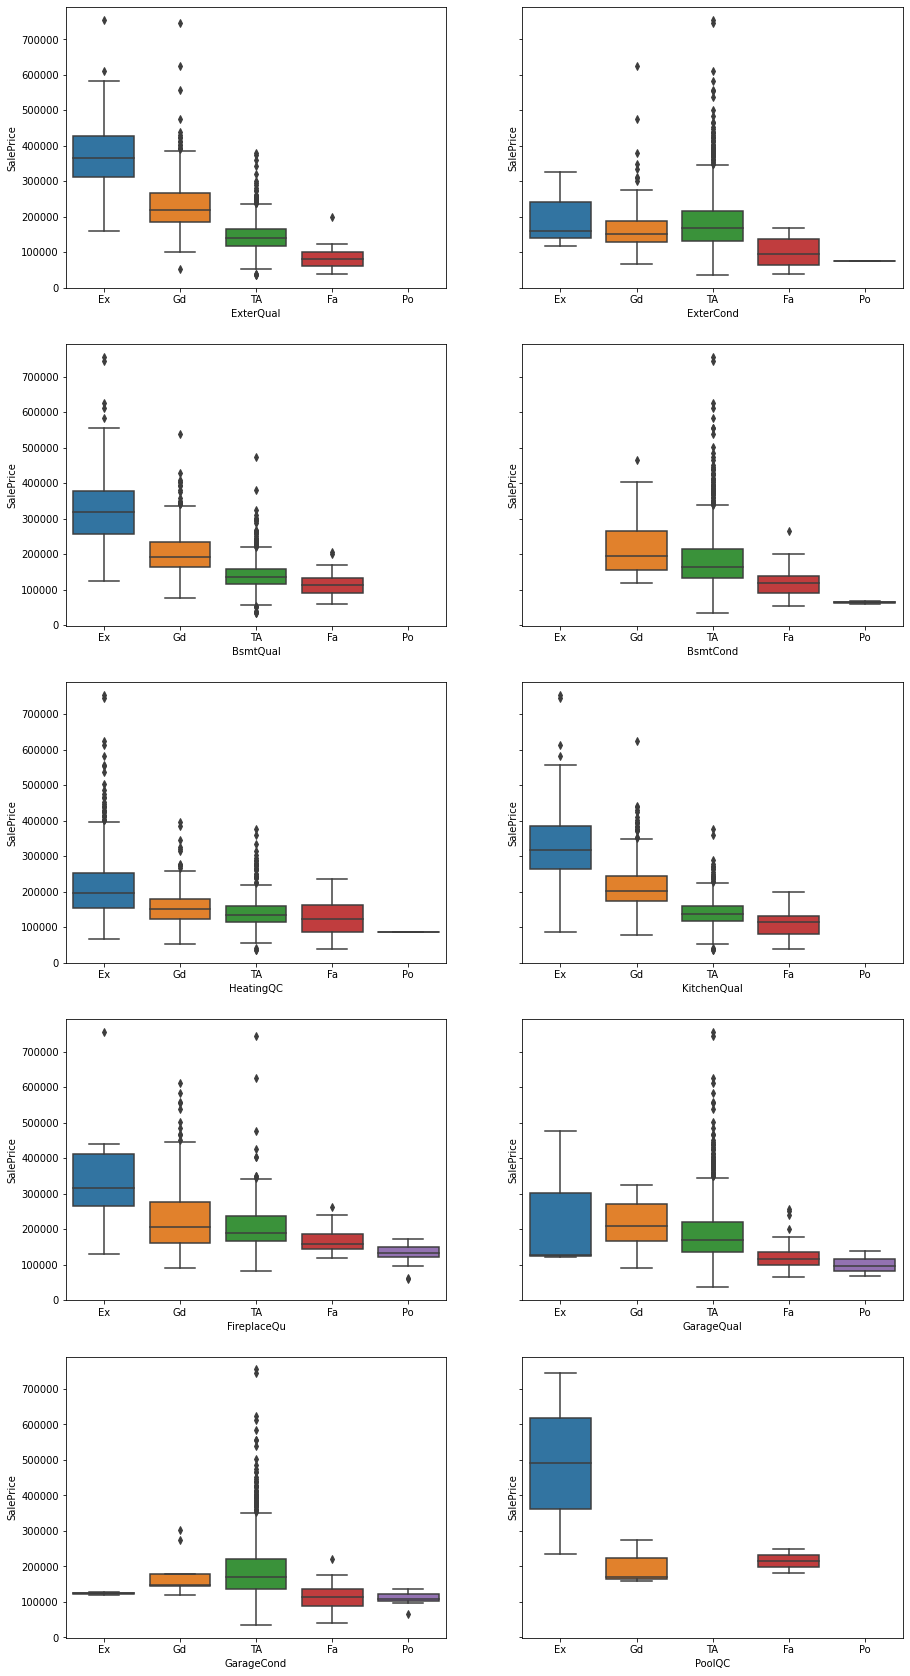

In [ ]:
l=0
m=0
f, axes = plt.subplots(5,2,sharey=True,figsize=(15, 30))
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']:
  fig = sns.boxplot(x=i, y=dataset_train["SalePrice"], data=cat_features, ax=axes[m,l],order=['Ex','Gd','TA','Fa','Po'])
  if l<1: l=l+1
  else: l=0;m=m+1

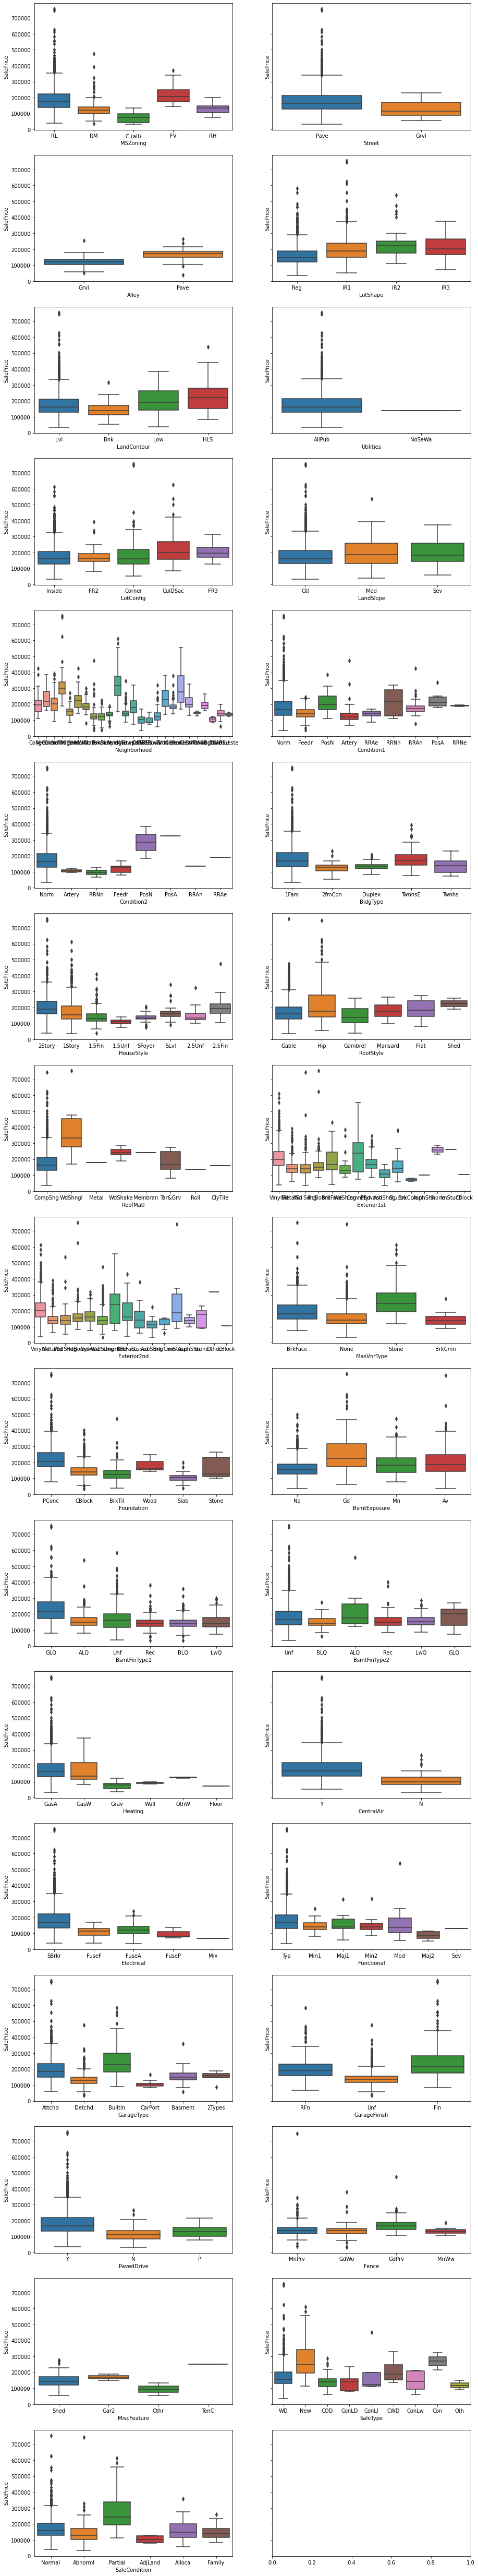

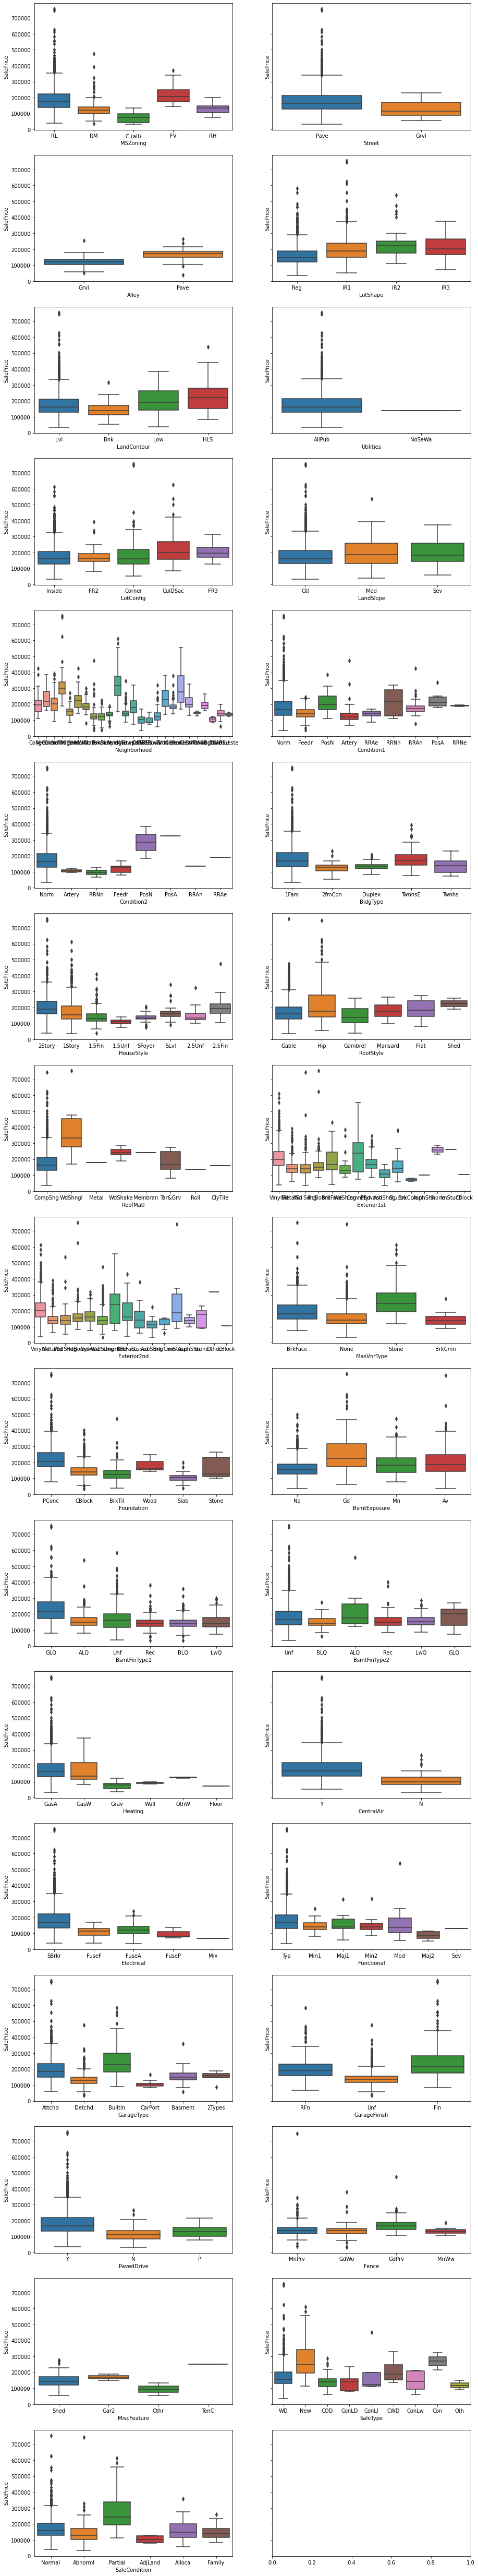

In [ ]:
l=0
m=0
f, axes = plt.subplots(17,2,sharey=True,figsize=(15, 90))
list1 = [i for i in cat_features.columns if i not in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',\
                                                      'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC'] ]
for i in list1:
  fig = sns.boxplot(x=i, y=dataset_train["SalePrice"], data=cat_features, ax=axes[m,l])
  if l<1: l=l+1
  else: l=0;m=m+1

Houses with "Street"/"Alley" with 'Pavement' are more costlier than with 'Gravel'.

'Noridge' , 'NridgHt' , 'StoneBr' are the costliest "Neighborhoods"

"Condition2" with 'PosA'(Adjacent to postive off-site feature) and 'PosN'(Near positive off-site feature--park, greenbelt, etc.) have clear positive impact on "SalePrice"

"RoofStyle" with 'Shed' have highest "SalePrice"

"Roof_Material" with 'WdShngl'	(Wood Shingles) crosses the "SalePrice" median 300,000$

"Erterior1st" with 'CemntBd'(Cement Board), 'ImStucc'(Imitation Stucco) , 'Stone' have highest "SalePrice"

"Masonry veneer type" with 'Stone' have highest "SalePrice".

"Exterior_Quality", "Basement_Quality", "Kitchen_Quality", "FirePlace_Quality" with 'Excellent' have highest "SalePrice" i.e median crosses 350,000$

"Foundation" with 'PConc' (Poured Contrete) have the highest "SalePrice"


"Basement_Finish_Type1" of 'GLQ'(Good Living Quaters) is the costliest type of house

The presence of "Central_air_Conditioning" will increase the "SalePrice"

"Pool_Quality" with  'Excellent' are costliest, i.e crosses 500,000$ median.

"MiscFeature" with 'Tenc'(Tennis Court) are costlier.

"Sale_Condition" with 'Partial'	(Home was not completed when last assessed (associated with New Homes)) are higher in price than the other.

Varibles having both Quality and Condition could be combined

##Correalation

In [ ]:
#Finding Correlation between variables
corr = dataset_train.corr()

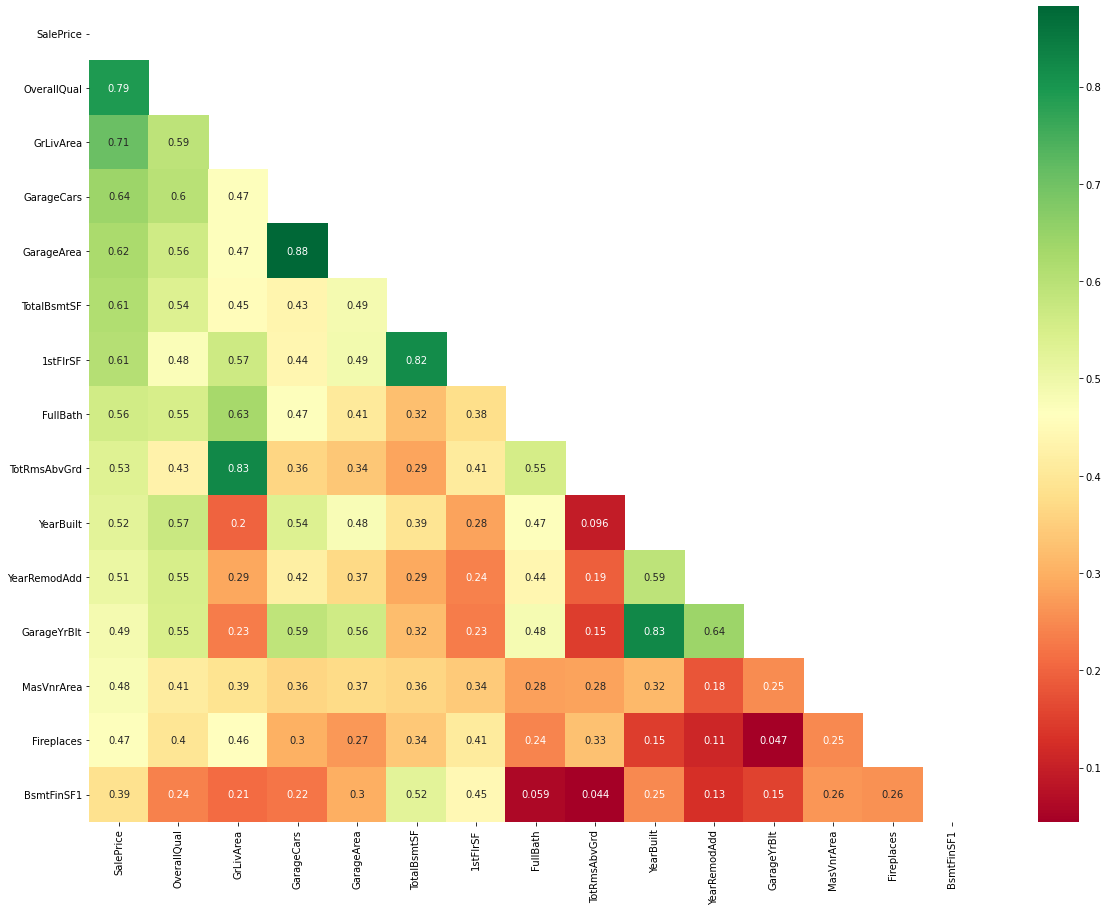

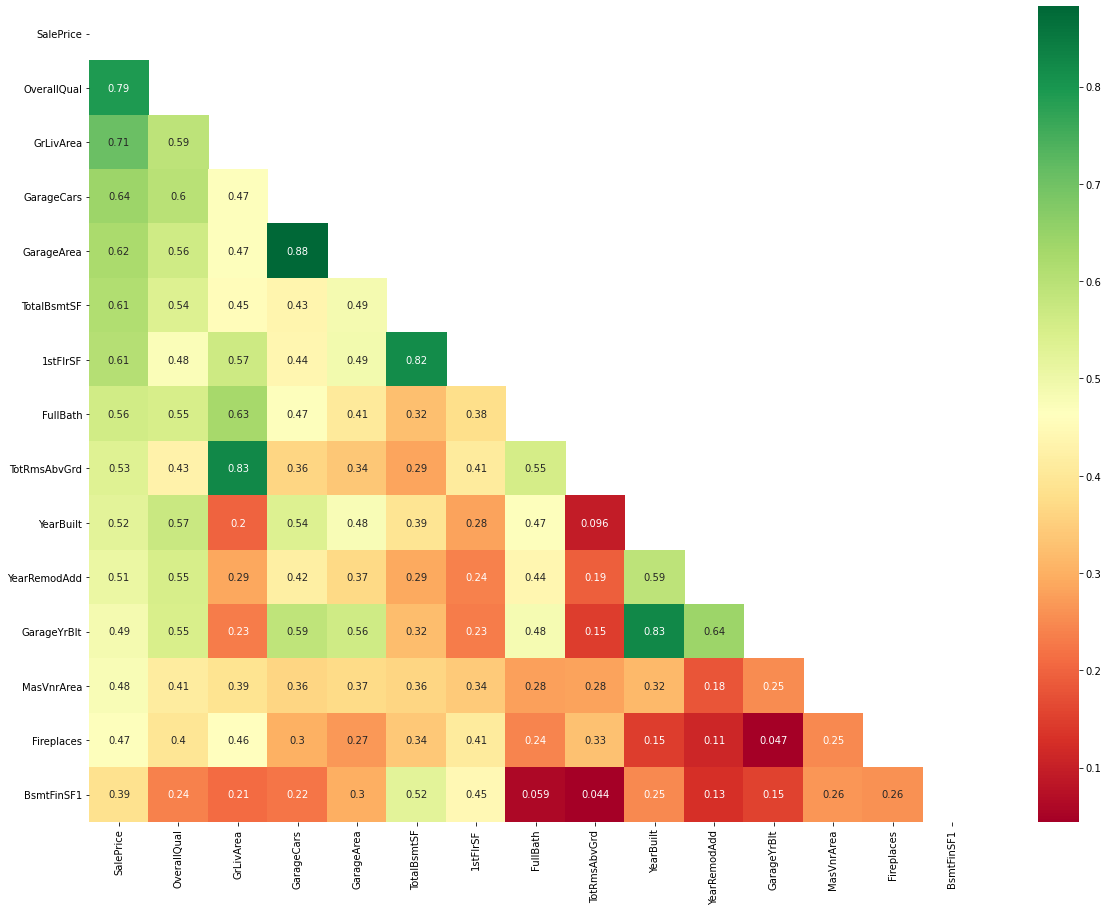

In [ ]:
high= corr.nlargest(15,'SalePrice')['SalePrice'].index
#Finding Correlation between variables
corr = dataset_train[high].corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

Observations :




1.   'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

1.   'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
2.   'TotalBsmtSF' and '1stFloor' could be combined to create a new variable.

2.   'TotRmsAbvGrd' and 'GrLivArea', twins







##Bivariate Analysis

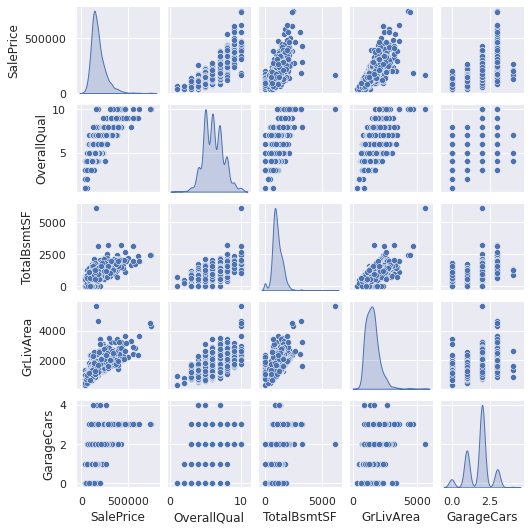

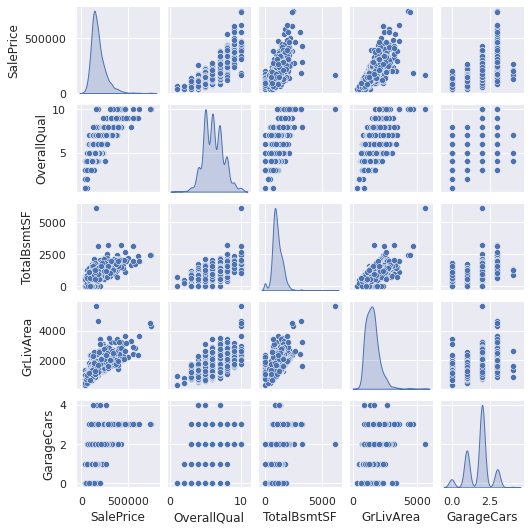

In [ ]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars']
sns.pairplot(dataset_train[columns],height= 1.5 ,kind ='scatter',diag_kind='kde')
plt.show()

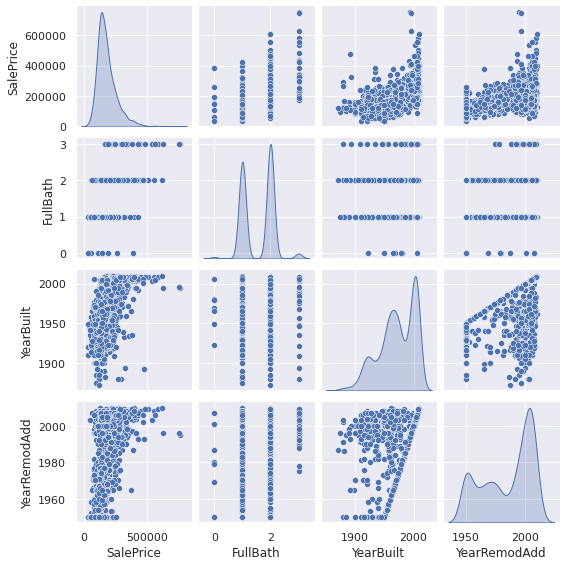

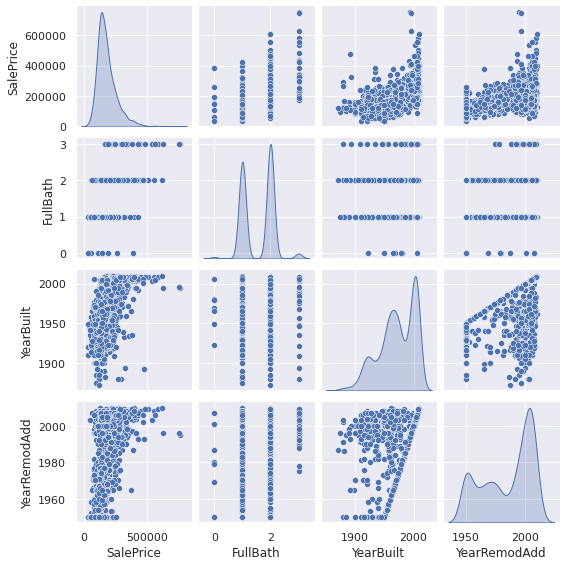

In [ ]:
sns.set()
columns = ['SalePrice','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(dataset_train[columns],height= 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Although we already know some of the main figures, this pair plot gives us a reasonable overview insight about the correlated features .Here are some of my analysis.


*   One interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.


*   One more interesting observation is between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function.We can also see this same tendency in the upper limit of the 'dots cloud'
*  Last observation is that prices are increasing faster now with respect to previous years. 







##Variables that are highly Correalated with Target variable

In [ ]:
print("\nCorrelations with SalePrice: ")
corr = dataset_train.corr()

Highest_corr = corr.nlargest(20, 'SalePrice')['SalePrice']
print(Highest_corr)


Correlations with SalePrice: 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Correlations with SalePrice: 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDe

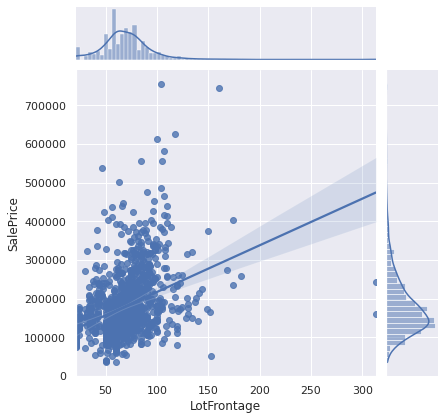

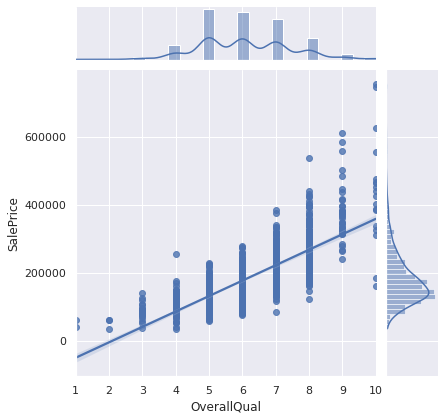

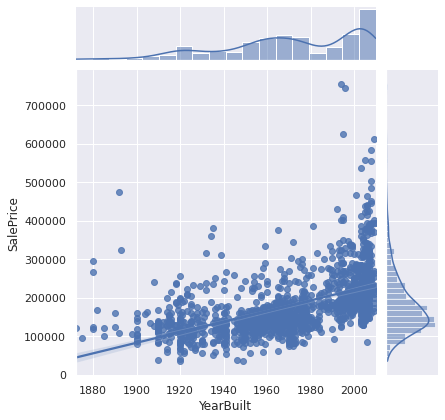

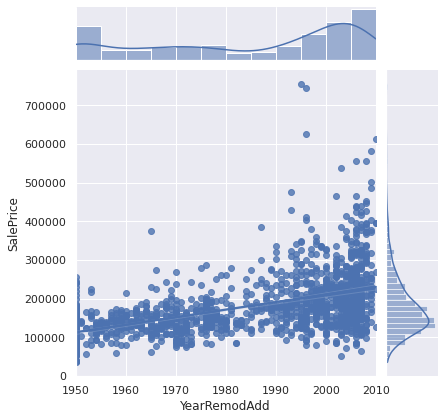

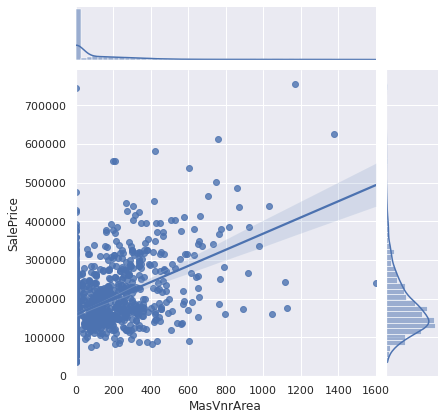

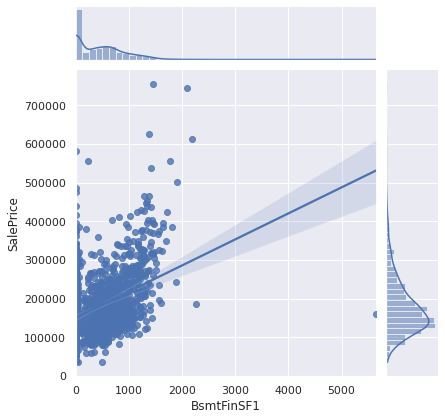

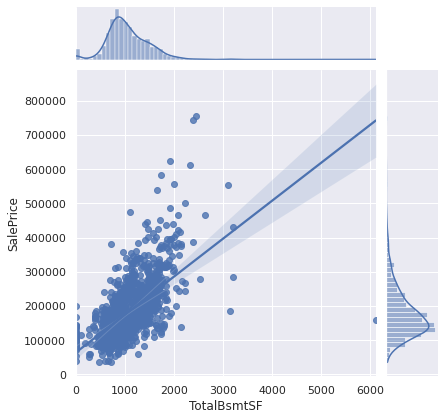

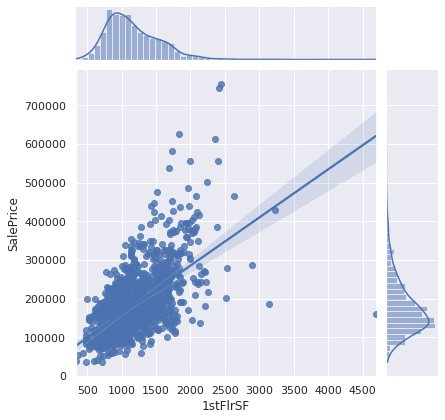

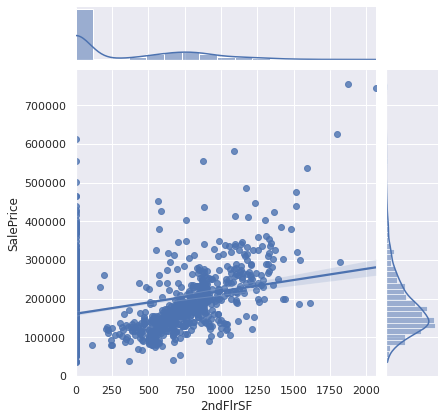

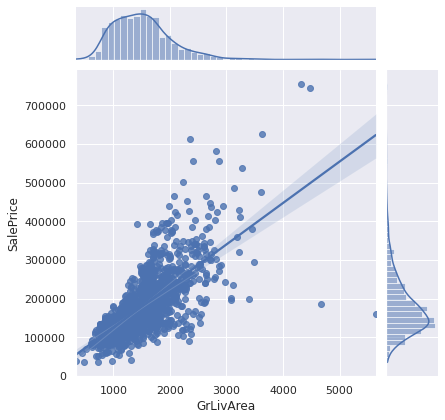

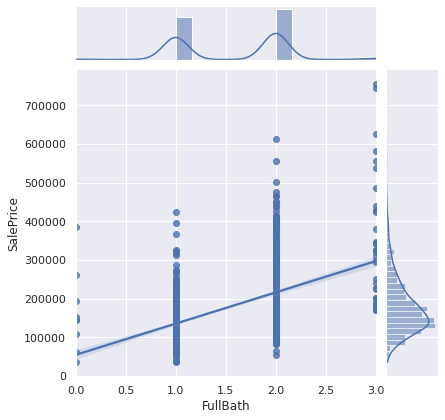

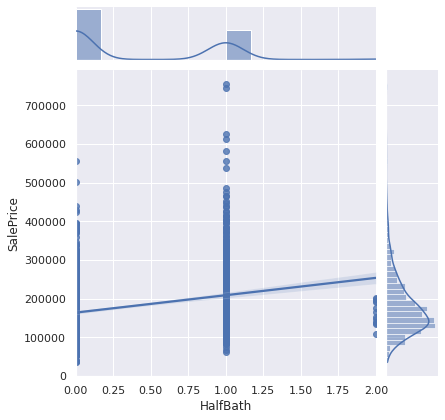

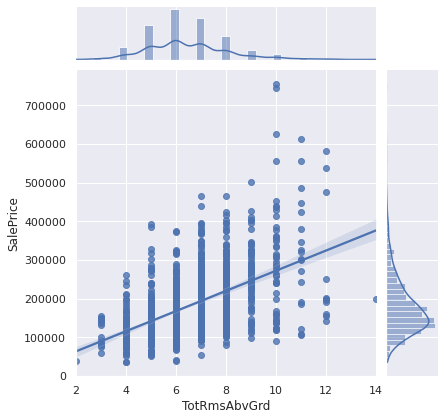

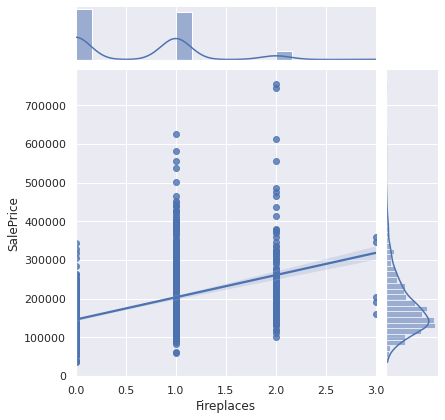

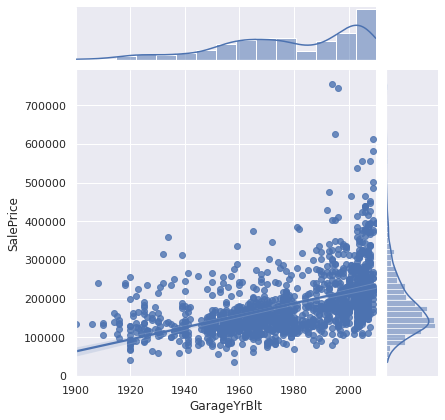

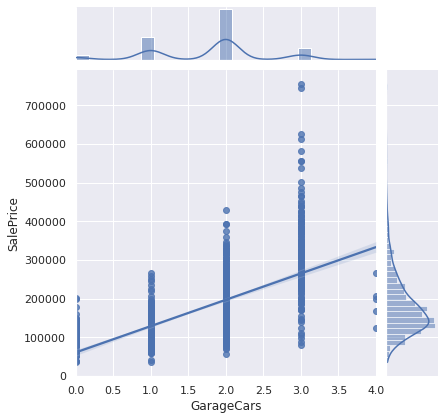

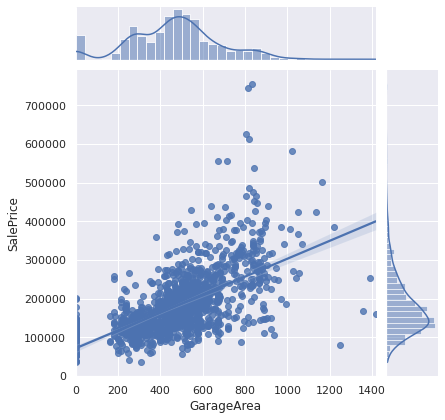

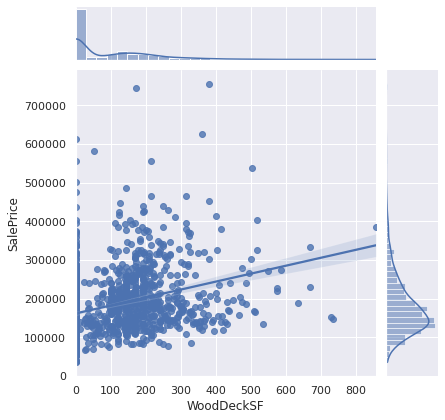

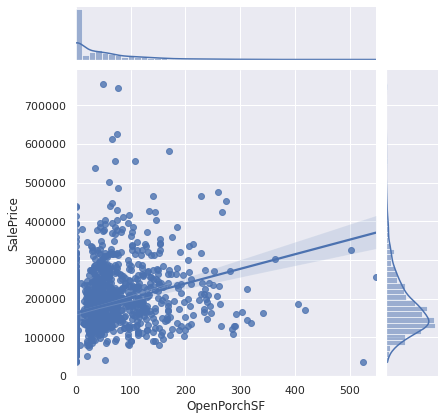

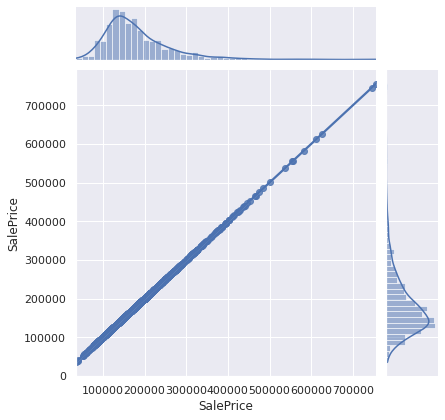

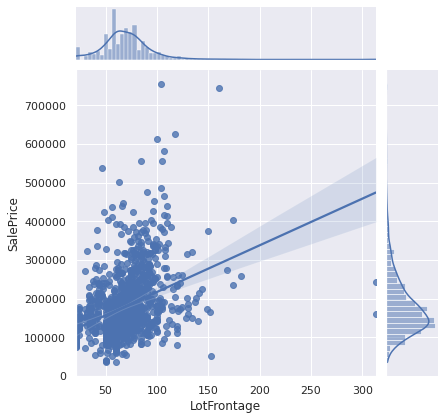

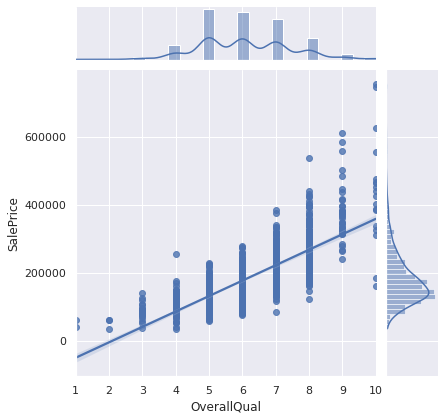

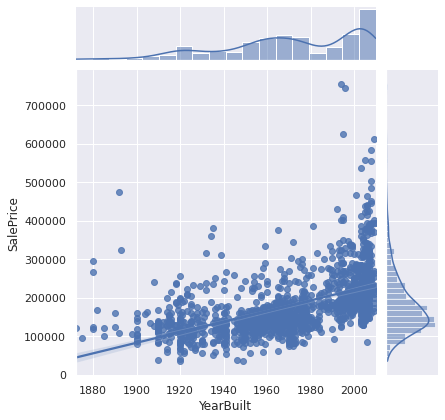

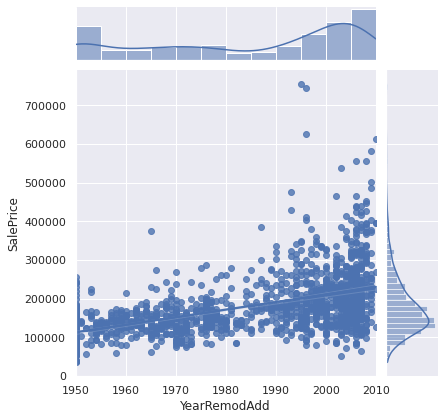

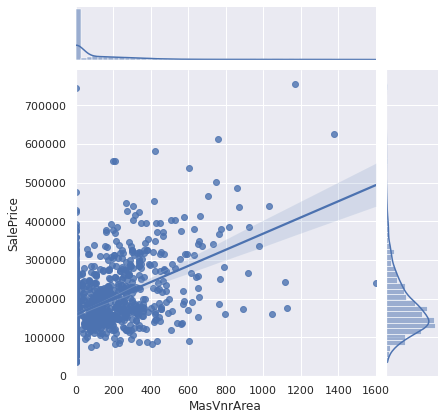

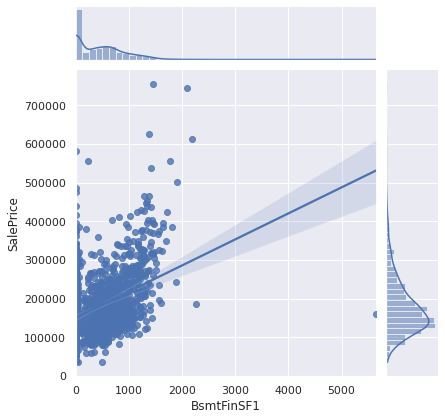

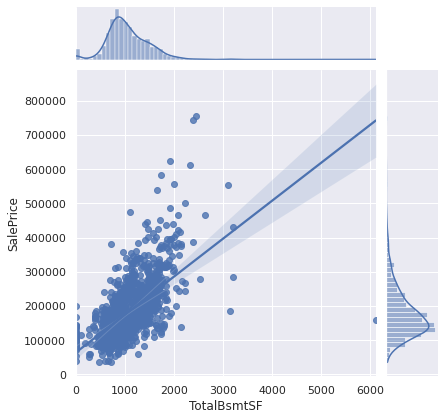

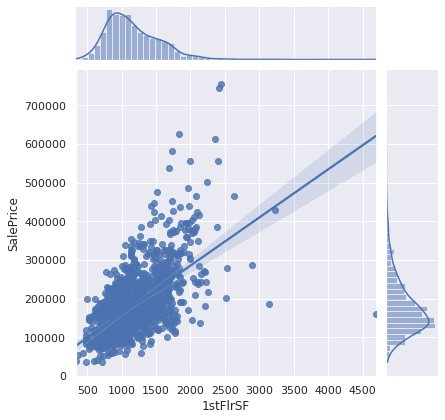

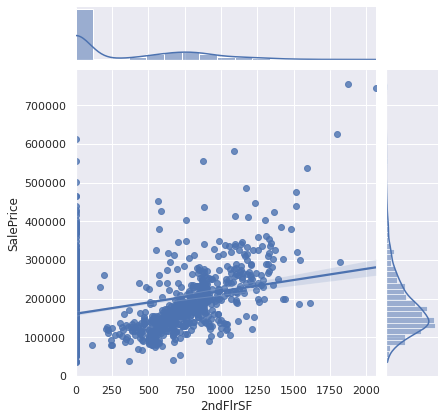

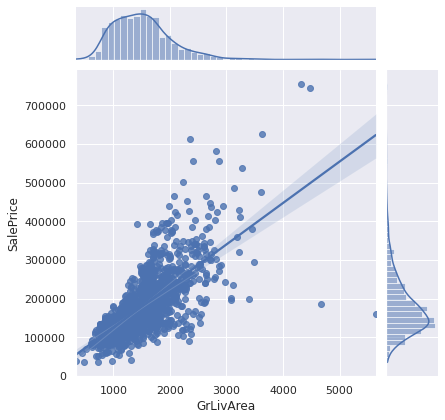

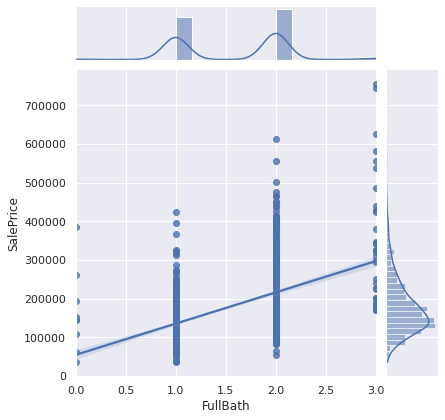

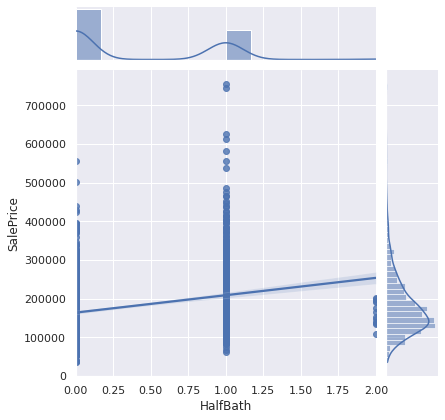

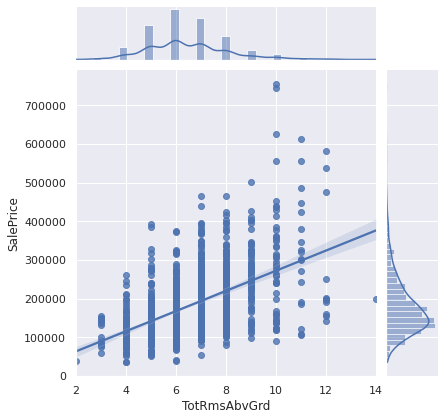

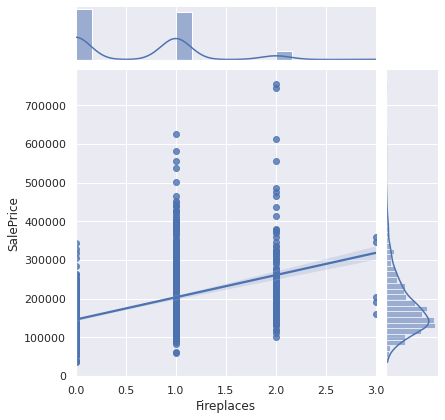

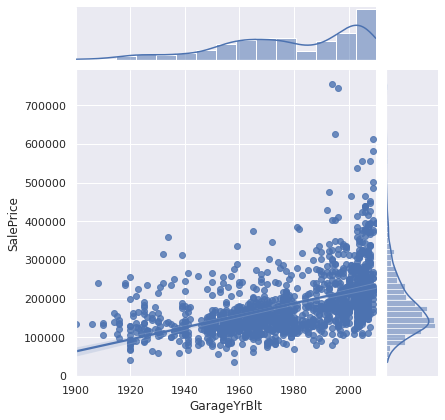

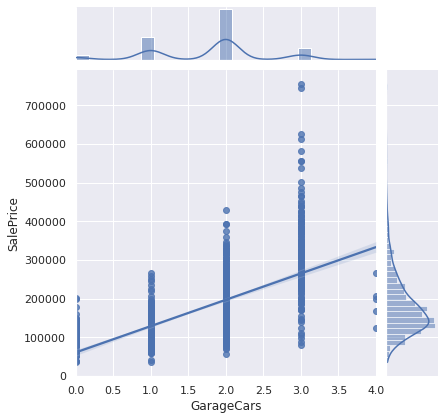

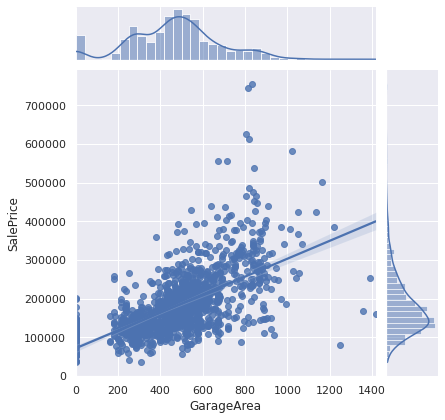

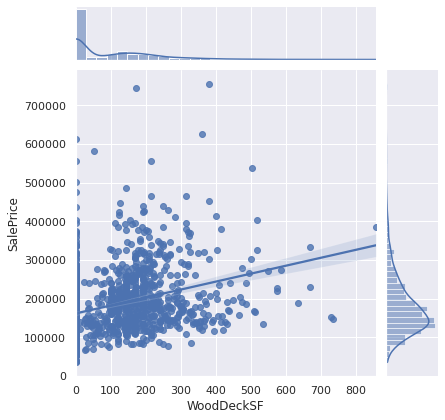

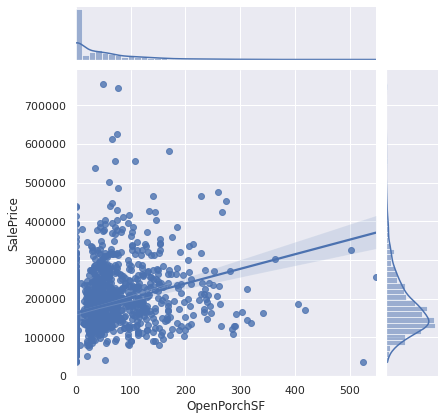

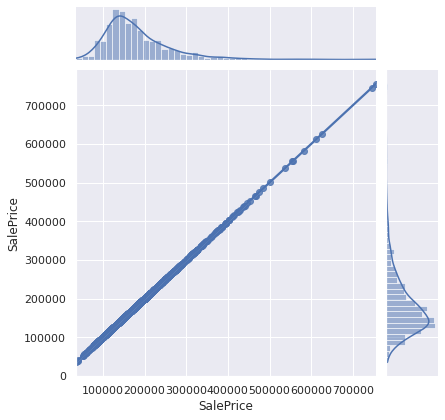

In [ ]:
#Scatterplot of highly correlated variables
Target = [f for f in dataset_train.columns if f in Highest_corr]
for i in Target:
  #data = pd.concat([dataset_train['SalePrice'], dataset_train[i]], axis=1)
  sns.jointplot(x=dataset_train[i], y=dataset_train['SalePrice'], kind='reg')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


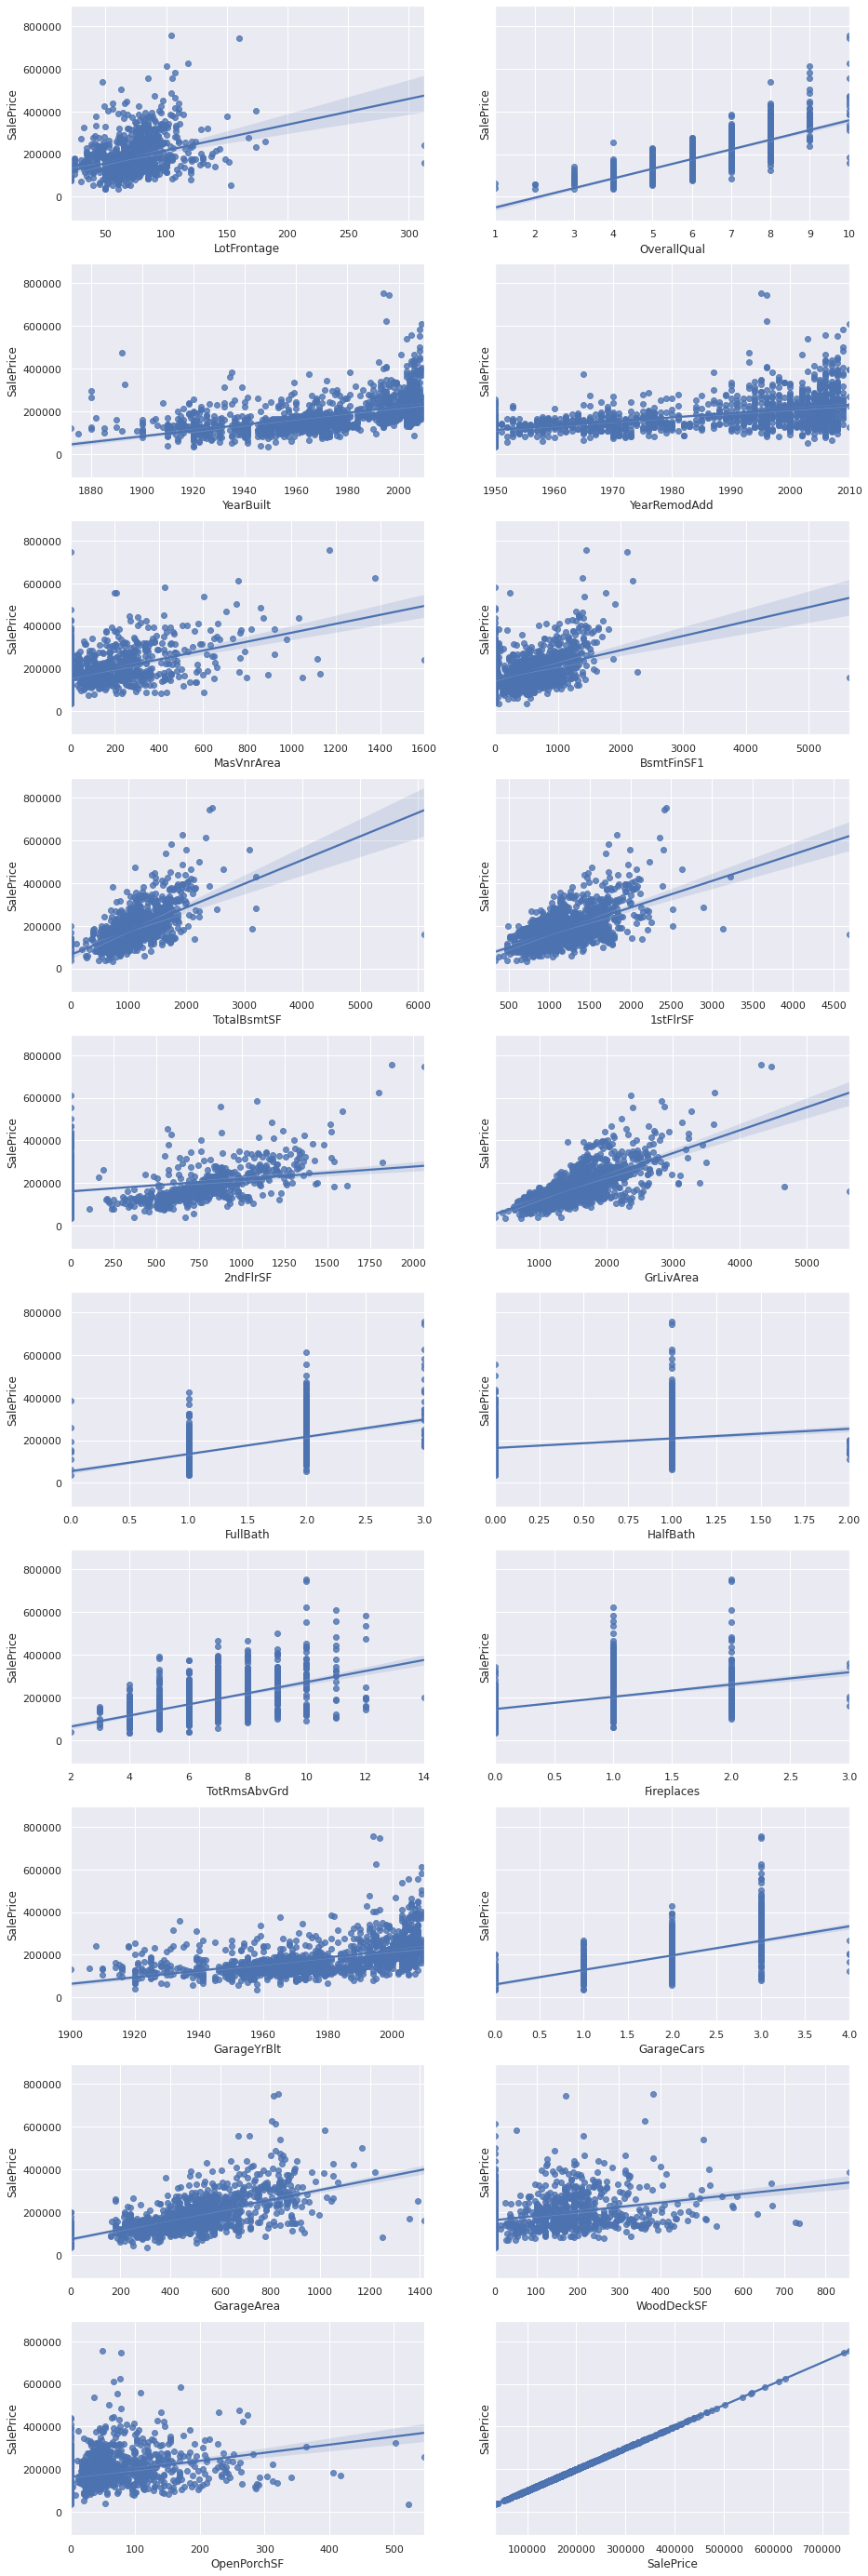

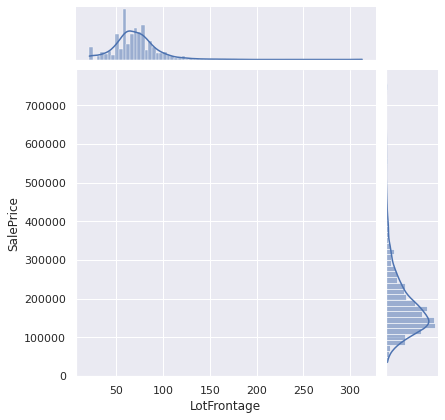

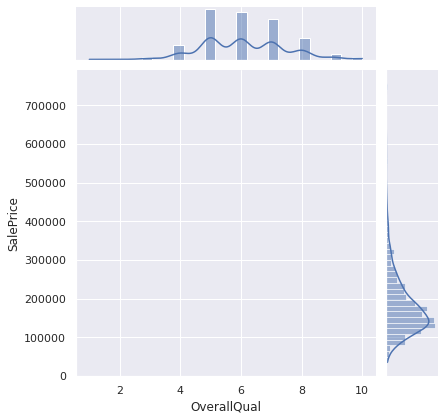

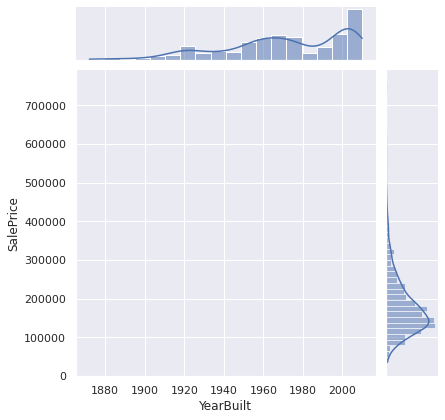

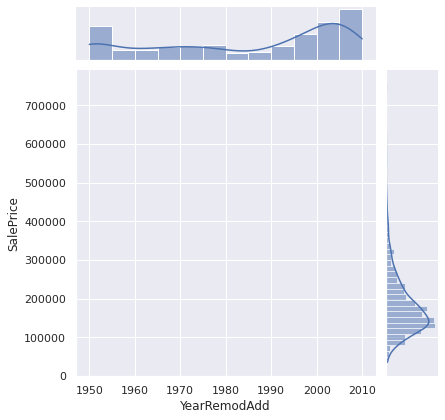

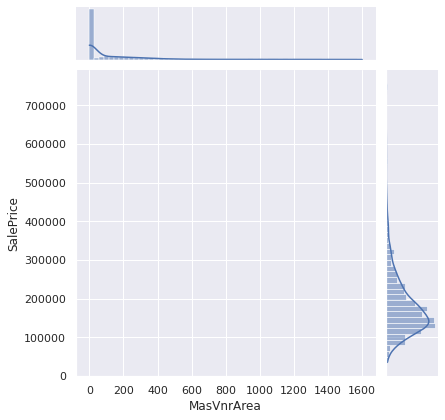

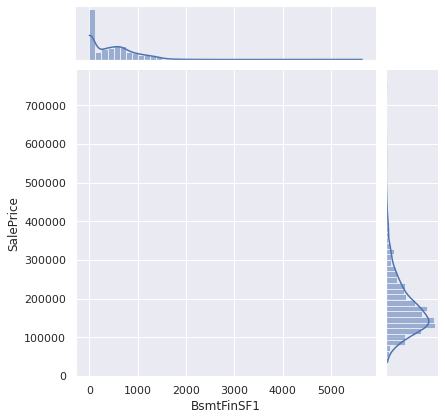

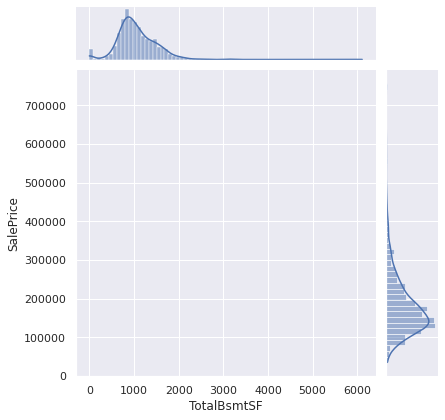

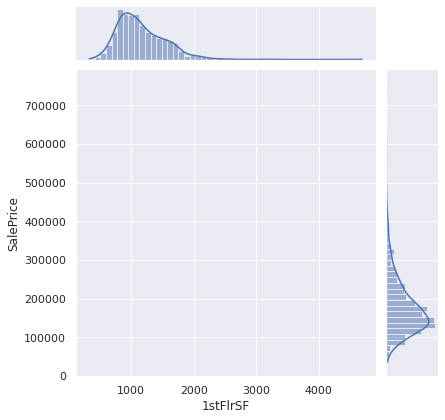

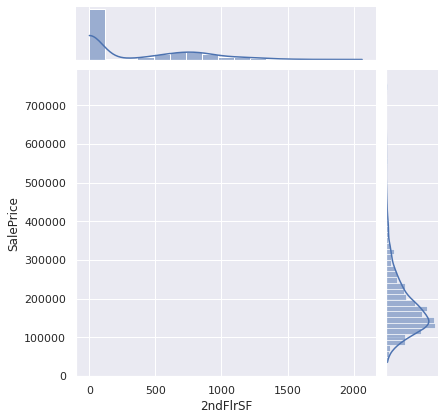

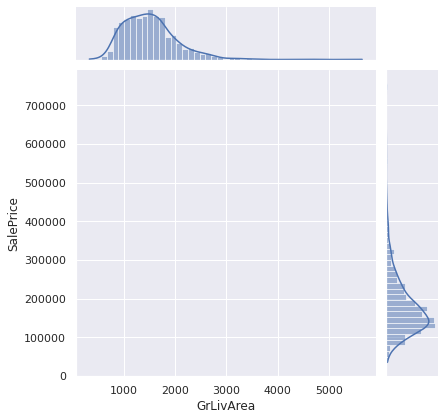

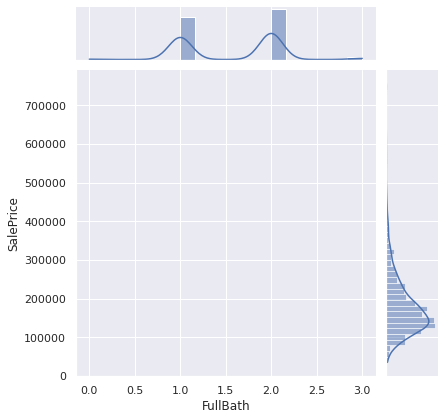

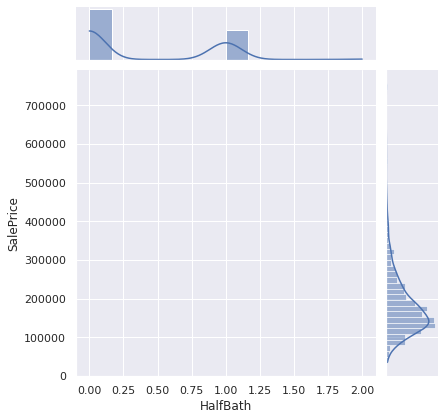

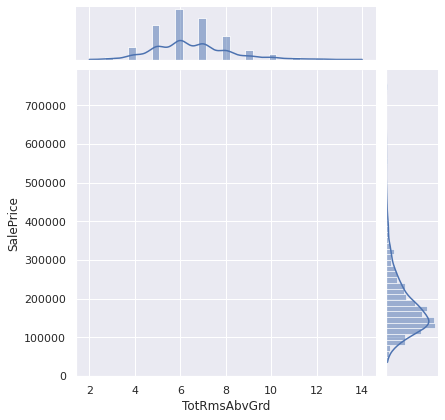

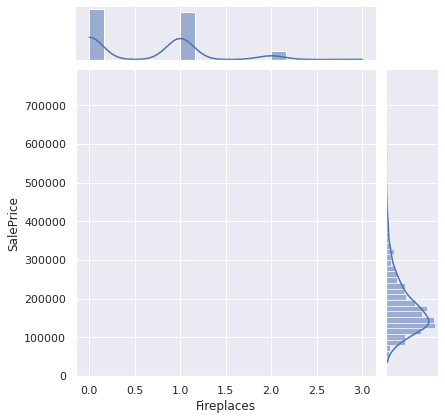

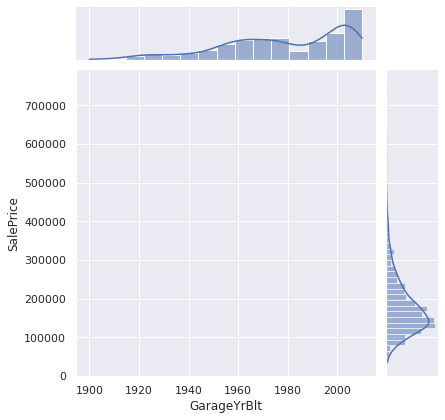

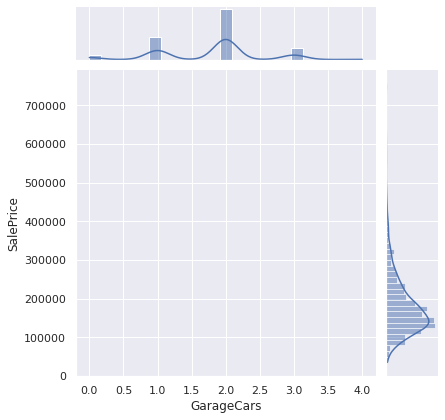

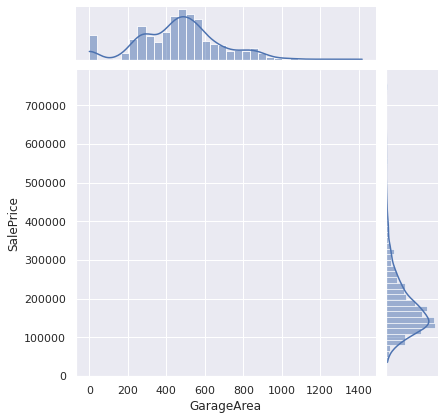

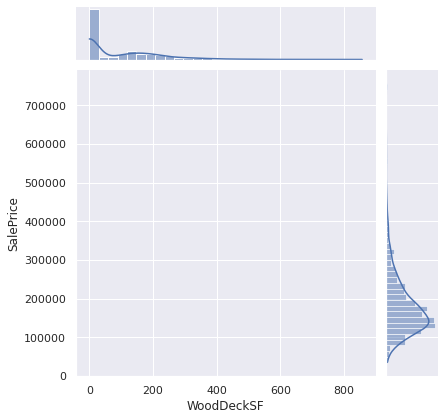

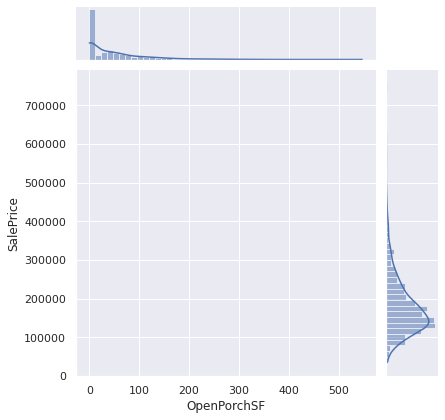

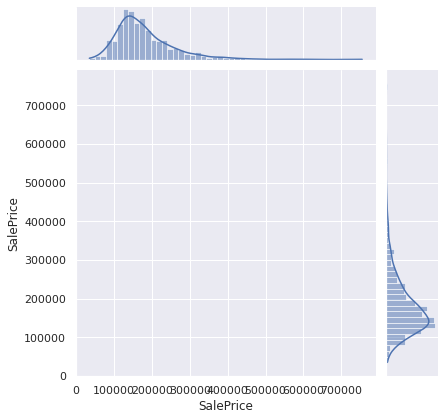

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


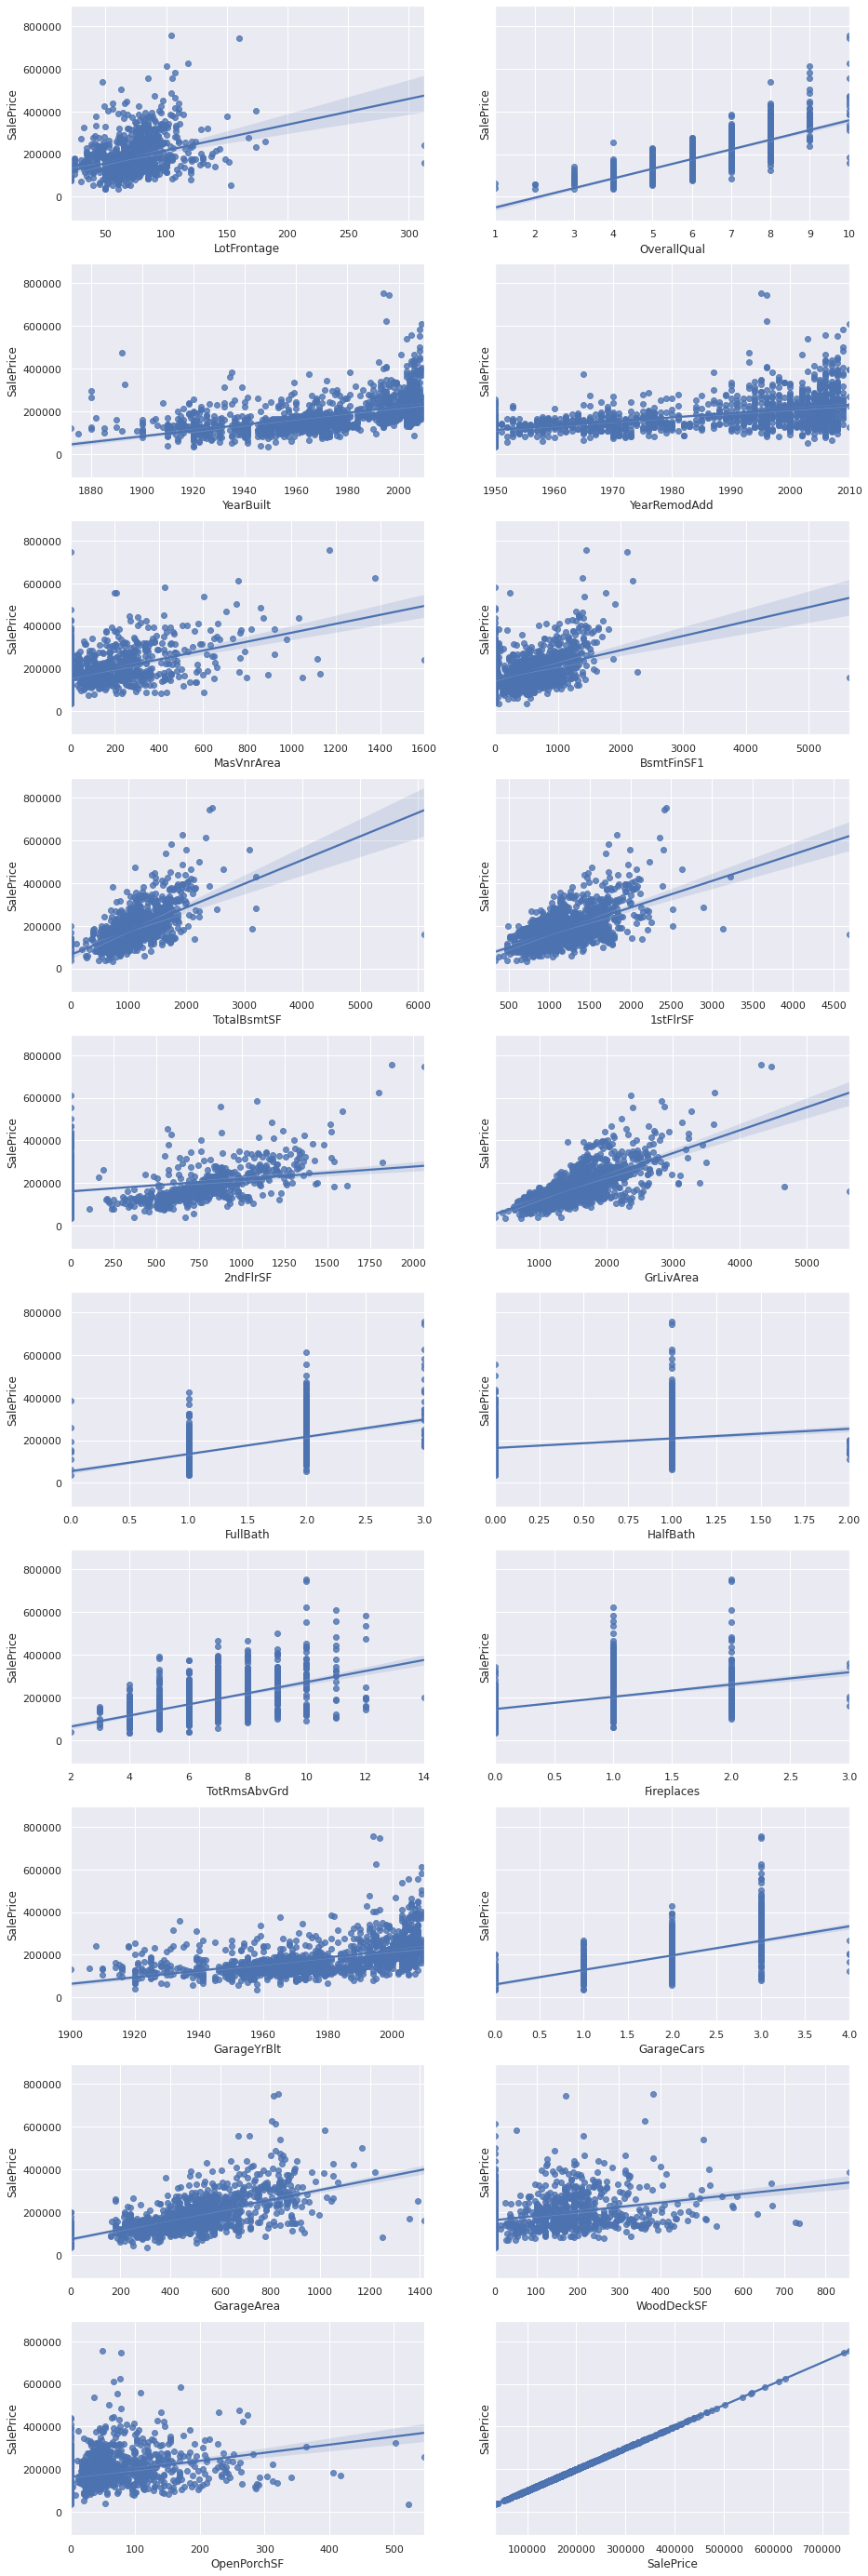

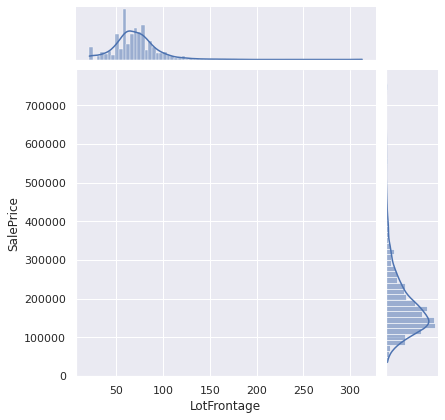

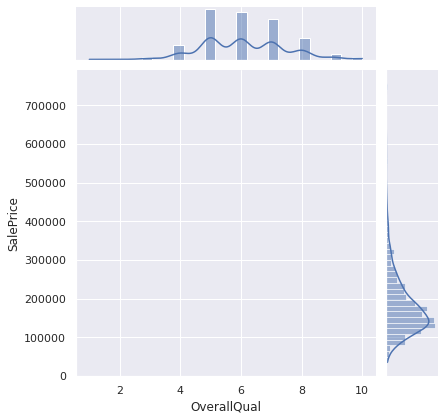

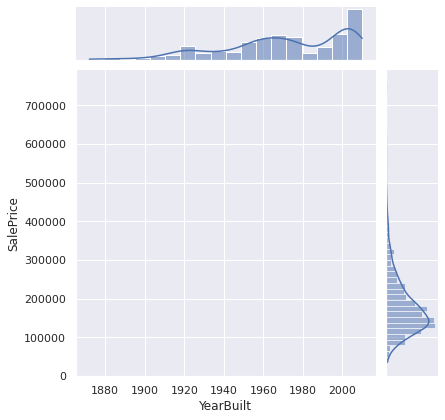

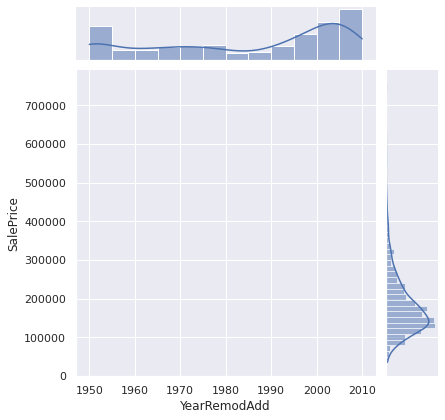

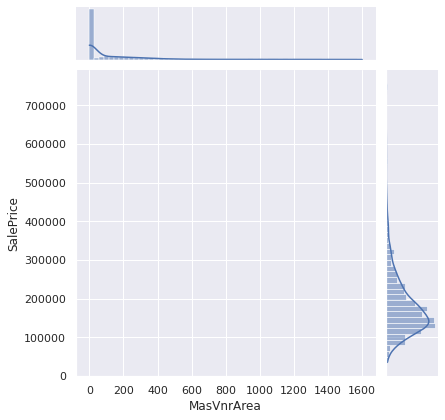

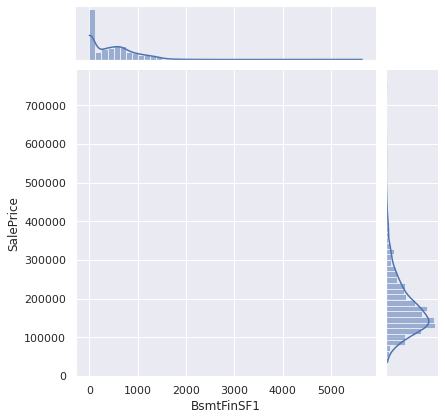

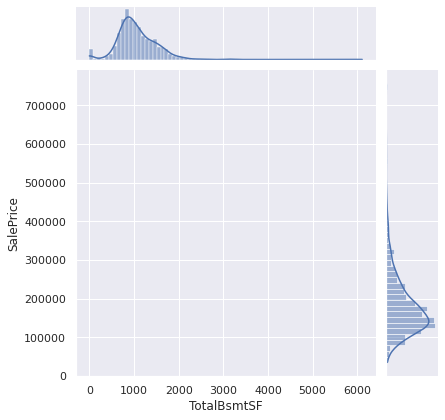

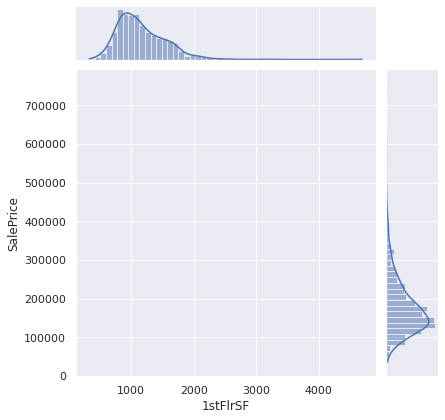

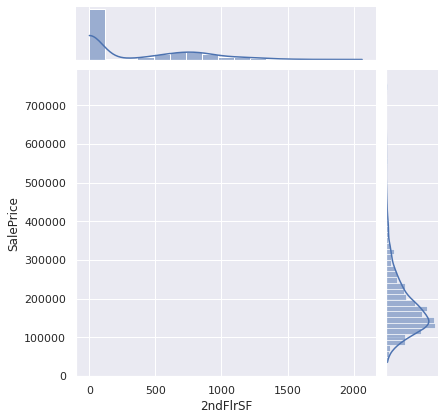

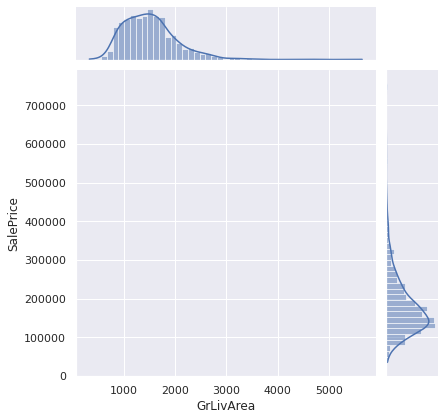

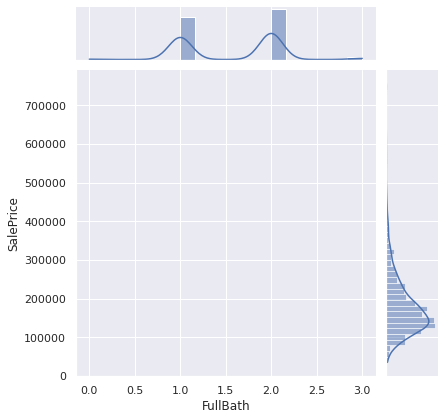

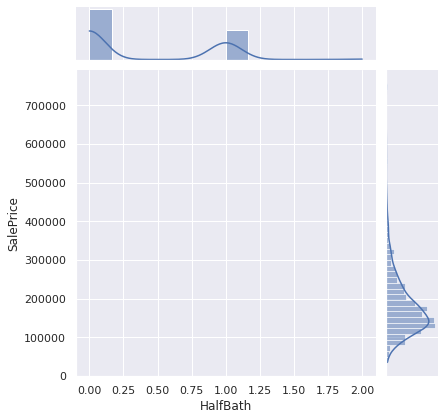

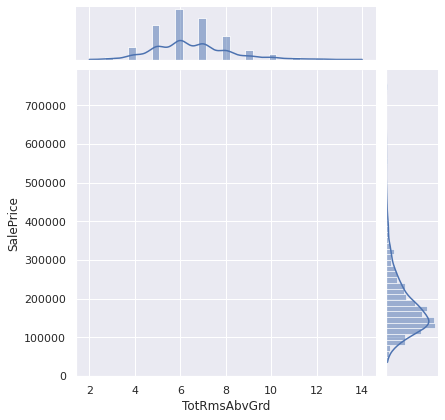

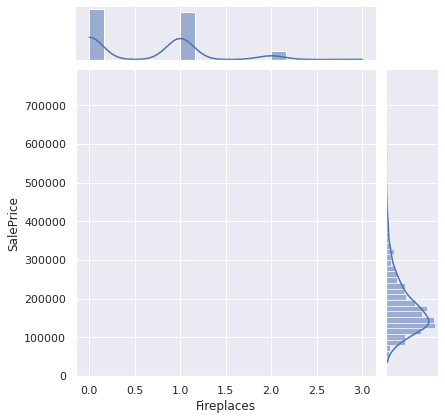

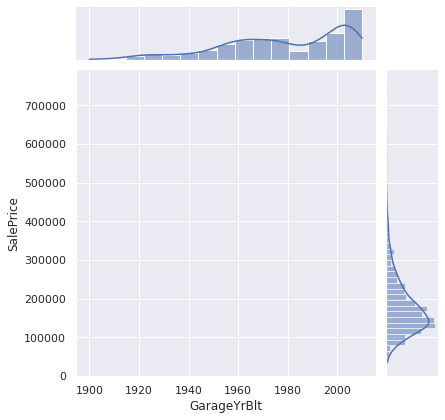

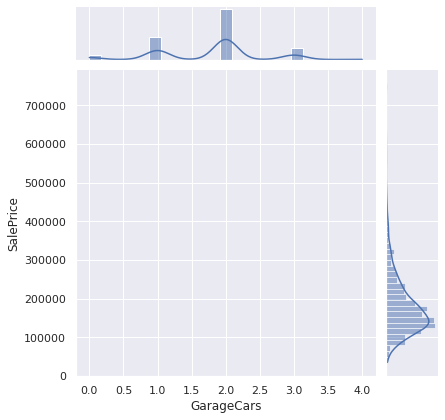

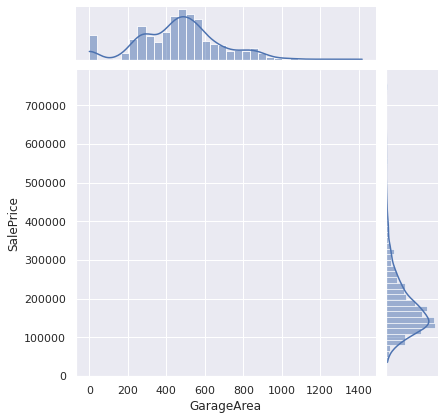

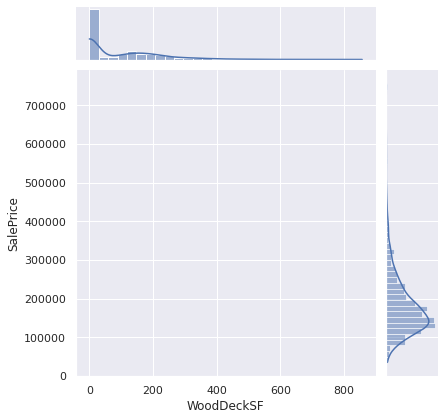

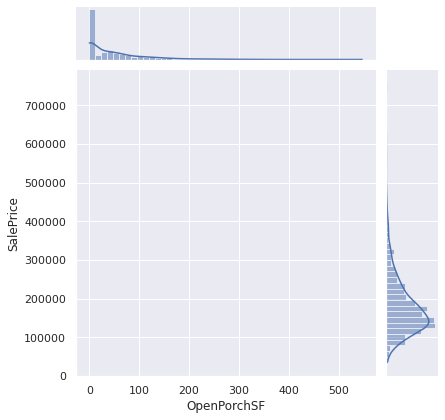

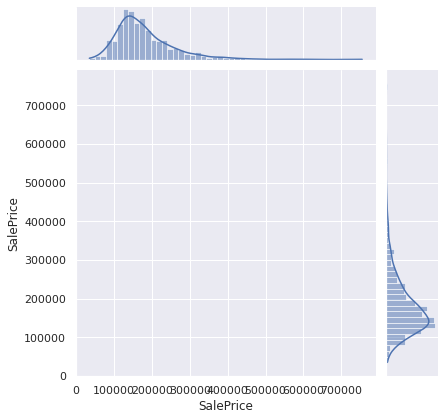

In [ ]:
l=0
m=0
f, axes = plt.subplots(10,2,sharey=True,figsize=(15, 50))
Target = [f for f in dataset_train.columns if f in Highest_corr]
for i in Target:
  fig = sns.jointplot(x=dataset_train[i], y=dataset_train['SalePrice'],kind='reg',data=dataset_train,  ax=axes[m,l])
  if l<1: l=l+1
  else: l=0;m=m+1

In [ ]:
dataset_train = dataset_train[dataset_train.GrLivArea < 4500]
dataset_train.reset_index(drop=True, inplace=True)

In [ ]:
dataset_train.shape

(1458, 81)

##Target Variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


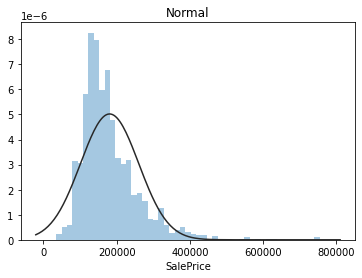

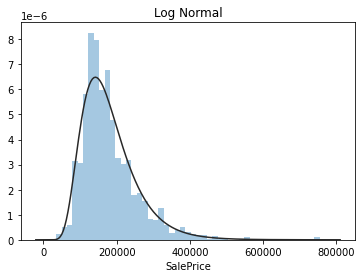

In [ ]:
#Distibution for SaLePrice
y = dataset_train['SalePrice']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)


Clearly normal distribution doesnt fit the target varible and log distribution fits well.

Before Modeling the SalePrice must be converted into Log distribution

#Preprocessing the Data

##Handling Null values

Taking the target variable outside into a series "y" and this used in test train split

In [ ]:
y = dataset_train.pop('SalePrice')

Creating a Null dataframe to see the total number of Null values  and also the % of null values in each variable of Train Data.

In [ ]:
Null_Values= dataset_train.isnull().sum()
Percentage = (dataset_train.isnull().sum()/1458)
Null= pd.concat([Null_Values,Percentage], axis =1 , keys = ["Total Null Values","Percentage"])
Null=Null.sort_values(by = "Total Null Values",ascending=False)

Null.head(20)

Total Null Values  Percentage
PoolQC                     1452    0.995885
MiscFeature                1404    0.962963
Alley                      1367    0.937586
Fence                      1177    0.807270
FireplaceQu                 690    0.473251
LotFrontage                 259    0.177641
GarageType                   81    0.055556
GarageYrBlt                  81    0.055556
GarageQual                   81    0.055556
GarageCond                   81    0.055556
GarageFinish                 81    0.055556
BsmtFinType2                 38    0.026063
BsmtExposure                 38    0.026063
BsmtCond                     37    0.025377
BsmtFinType1                 37    0.025377
BsmtQual                     37    0.025377
MasVnrArea                    8    0.005487
MasVnrType                    8    0.005487
Electrical                    1    0.000686
HalfBath                      0    0.000000

Out of 80 Independent variables 19 variables have atleast one null value.

Test Data

In [ ]:
Null_Values= dataset_test.isnull().sum()
Percentage = (dataset_test.isnull().sum()/1459)
Null= pd.concat([Null_Values,Percentage], axis =1 , keys = ["Total Null Values","Percentage"])
Null=Null.sort_values(by = "Total Null Values",ascending=False)

Null.head(35)

Total Null Values  Percentage
PoolQC                     1456    0.997944
MiscFeature                1408    0.965045
Alley                      1352    0.926662
Fence                      1169    0.801234
FireplaceQu                 730    0.500343
LotFrontage                 227    0.155586
GarageYrBlt                  78    0.053461
GarageQual                   78    0.053461
GarageFinish                 78    0.053461
GarageCond                   78    0.053461
GarageType                   76    0.052090
BsmtCond                     45    0.030843
BsmtQual                     44    0.030158
BsmtExposure                 44    0.030158
BsmtFinType1                 42    0.028787
BsmtFinType2                 42    0.028787
MasVnrType                   16    0.010966
MasVnrArea                   15    0.010281
MSZoning                      4    0.002742
BsmtHalfBath                  2    0.001371
Utilities                     2    0.001371
Functional                    2    0.001371
BsmtFullBath                  2    0.001371
BsmtFinSF1                    1    0.000685
BsmtFinSF2                    1    0.000685
BsmtUnfSF                     1    0.000685
KitchenQual                   1    0.000685
TotalBsmtSF                   1    0.000685
Exterior2nd                   1    0.000685
GarageCars                    1    0.000685
Exterior1st                   1    0.000685
GarageArea                    1    0.000685
SaleType                      1    0.000685
MiscVal                       0    0.000000
BedroomAbvGr                  0    0.000000

Out of 80 Independent variables 33 variables have atleat one null value.


"PoolQC", "MiscFeature", "Alley", "Fence" have more than 1000 null values so dropping them

In [ ]:
dataset_train.drop(["PoolQC","MiscFeature","Alley","Fence"], axis=1, inplace=True)

In [ ]:
dataset_test.drop(["PoolQC","MiscFeature","Alley","Fence"], axis=1, inplace=True)

The following are categorical features and their empty values are filled with "NA"

In [ ]:
for i in ["FireplaceQu",'GarageType', 'GarageFinish', 'GarageQual','GarageCond',
          'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2']:
          dataset_train[i].fillna('NA', inplace=True)        

In [ ]:
for i in ["FireplaceQu",'GarageType', 'GarageFinish', 'GarageQual','GarageCond',
          'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2']:
          dataset_test[i].fillna('NA', inplace=True)        

"MasVnrType" null values are filled with "None"

In [ ]:

dataset_train["MasVnrType"].fillna("None",inplace=True)

In [ ]:
dataset_test["MasVnrType"].fillna("None",inplace=True)

'GarageYrBlt', 'GarageCars', 'MasVnrArea'. These features are numerical so the null values are replaced with "0"

In [ ]:
for i in ['GarageYrBlt', 'GarageCars','MasVnrArea']:
          dataset_train[i].fillna(0, inplace=True)

In [ ]:
for i in ['GarageYrBlt', 'GarageCars', 'BsmtFinSF1','MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
          'BsmtHalfBath']:
          dataset_test[i].fillna(0, inplace=True)

 'Electrical' variable's null values are replaced with mode 

In [ ]:
dataset_train['Electrical'].fillna(dataset_train['Electrical'].mode()[0], inplace=True)

In [ ]:
dataset_test['Electrical'].fillna(dataset_train['Electrical'].mode()[0], inplace=True)

 'KitchenQual', 'Exterior2nd',  'SaleType' , "Functional" . These variable's null values are replaced with train data mode 

In [ ]:
for i in ['KitchenQual','Exterior1st','Exterior2nd','SaleType',"Functional"]:
  dataset_test[i].fillna(dataset_train[i].mode()[0], inplace=True)
  


To fill null values in MSZooning, prepocess is grouped by MSSubclass and then replaced with the MSZooning mode obtaing after the grouping 

In [ ]:
dataset_test[dataset_test['MSZoning'].isnull()].index.tolist()

[455, 756, 790, 1444]

In [ ]:
dataset_test.MSZoning = dataset_test.MSZoning.fillna(dataset_test.MSSubClass.map(
    dataset_train.groupby("MSSubClass")["MSZoning"].agg(lambda x: pd.Series.mode(x)[0]).to_dict()))

In [ ]:
dataset_test.MSZoning.iloc[455]

'RL'

To fill null values in LotFrontage, prepocess is grouped by Neighborhood and then replaced with the LotFrontage median obtaing after the grouping 

In [ ]:
dataset_train["LotFrontage"] = dataset_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [ ]:
dataset_test[dataset_test['LotFrontage'].isnull()].index.tolist()[0:4]

[6, 40, 41, 45]

In [ ]:
dataset_test.LotFrontage = dataset_test.LotFrontage.fillna(dataset_test.Neighborhood.map(dataset_train.groupby("Neighborhood")["LotFrontage"].agg(lambda x: pd.Series.median(x)).to_dict()))

In [ ]:
dataset_test.LotFrontage.iloc[6]

65.0

"GarageArea" variable null values are replaced with it's mean

In [ ]:
dataset_test['GarageArea'].fillna(dataset_train['GarageArea'].mean(),inplace = True)

In [ ]:
dataset_train['Utilities'].value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

There isnt much variation in this variable and cannot help in modeling so dropping Utilities

In [ ]:
dataset_train.drop(['Utilities'], axis=1,inplace=True)

In [ ]:
dataset_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

There isnt much variation in this variable and cannot help in modeling so dropping Utilities

In [ ]:
dataset_test.drop(['Utilities'], axis=1,inplace=True)

Cheking whether there are any null values left in the dataset_train data


In [ ]:
dataset_train.isnull().sum().max()


0

Cheking whether there are any null values left in the dataset_test data


In [ ]:
dataset_test.isnull().sum().max()


0

Mapping all the Quality and Condition variables into numbers

In [ ]:
mapping  = {'Ex':5,'Gd':4,'TA':3, 'Fa':2,'Po':1,'NA':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
cols = ['ExterQual','ExterCond','BsmtCond','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'CentralAir','LotShape','BsmtExposure','BsmtFinType1','BsmtFinType2']
for c in cols:
  dataset_train[c]=dataset_train[c].map(mapping)

In [ ]:
mapping  = {'Ex':5,'Gd':4,'TA':3, 'Fa':2,'Po':1,'NA':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
cols = ['ExterQual','ExterCond','BsmtCond','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'CentralAir','LotShape','BsmtExposure','BsmtFinType1','BsmtFinType2']
for c in cols:
  dataset_test[c]=dataset_test[c].map(mapping)

##Feature Engineering

Combining the Basement, 1st Floor, 2nd Floor square footage into a new variable "Total_sqr_footage"

In [ ]:
dataset_train['Total_sqr_footage'] = (dataset_train['BsmtFinSF1'] + dataset_train['BsmtFinSF2'] +
                                 dataset_train['1stFlrSF'] + dataset_train['2ndFlrSF'])

In [ ]:
dataset_test['Total_sqr_footage'] = (dataset_test['BsmtFinSF1'] + dataset_test['BsmtFinSF2'] +
                                 dataset_test['1stFlrSF'] + dataset_test['2ndFlrSF'])

Combining the "YearBuilt" and "YearRemodAdd" into a new variable. It's an year for us but the machine if the sum is high then its price is high, as it is remodeled or newly built.

In [ ]:
dataset_train['YrBltAndRemod'] = dataset_train['YearBuilt']+dataset_train['YearRemodAdd']

In [ ]:

dataset_test['YrBltAndRemod'] = dataset_test['YearBuilt'] + dataset_test['YearRemodAdd']

Combining all the bathroom variables 'FullBath', 'HalfBath', 'BsmtFullBath', 'BasmtHalfBath' into "TotalBath"

In [ ]:
dataset_train['TotalBath'] = dataset_train['FullBath'] + (0.5 * dataset_train['HalfBath']) + dataset_train['BsmtFullBath'] +\
 (0.5 * dataset_train['BsmtHalfBath'])

In [ ]:
dataset_test['TotalBath'] = dataset_test['FullBath'] + (0.5 * dataset_test['HalfBath']) + dataset_test['BsmtFullBath'] +\
 (0.5 * dataset_test['BsmtHalfBath'])

Combining the Basement, 1st Floor, 2nd Floor surface area into a new variable "TotalSA"

In [ ]:
dataset_train['TotalSA']=dataset_train['TotalBsmtSF'] + dataset_train['1stFlrSF'] + dataset_train['2ndFlrSF']

In [ ]:
dataset_test['TotalSA']=dataset_test['TotalBsmtSF'] + dataset_test['1stFlrSF'] + dataset_test['2ndFlrSF']

In [ ]:
dataset_train[cols].head()

ExterQual  ExterCond  BsmtCond  ...  BsmtExposure  BsmtFinType1  BsmtFinType2
0          4          3         3  ...             2             6             1
1          3          3         3  ...             4             5             1
2          4          3         3  ...             2             6             1
3          3          3         4  ...             2             5             1
4          4          3         3  ...             3             6             1

[5 rows x 14 columns]

In [ ]:
dataset_test[cols].head()

ExterQual  ExterCond  BsmtCond  ...  BsmtExposure  BsmtFinType1  BsmtFinType2
0          3          3         3  ...             2             3             2
1          3          3         3  ...             2             5             1
2          3          3         3  ...             2             6             1
3          3          3         3  ...             2             6             1
4          4          3         3  ...             2             5             1

[5 rows x 14 columns]

We are not combining the Quality and Condition variables, as Quality indicates the material's quality that was used to construct and Condition indicates their present condition.

And also combinig them doesn't give better results.

Combing all the types of Porch Surface area's into "AllPorch" 

In [ ]:
dataset_train['AllPorch'] = dataset_train['OpenPorchSF'] + dataset_train['EnclosedPorch'] + dataset_train['3SsnPorch'] \
+ dataset_train['ScreenPorch']


In [ ]:
dataset_test['AllPorch'] = dataset_test['OpenPorchSF'] + dataset_test['EnclosedPorch'] + dataset_test['3SsnPorch'] \
+ dataset_test['ScreenPorch']


Creating new variable 'hasPool', and it is 1 if PoolArea > 0 or else 0 

In [ ]:
dataset_train['haspool'] = dataset_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
dataset_test['haspool'] = dataset_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


Creating new variable 'has2ndfloor', and it is 1 if 2nd_Floor_Surface_Area > 0 or else 0 

In [ ]:
dataset_train['has2ndfloor'] = dataset_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
dataset_test['has2ndfloor'] = dataset_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

Creating new variable 'hasbsmt', and it is 1 if Total_Bsmt_Surface_Area > 0 or else 0 

In [ ]:
dataset_train['hasbsmt'] = dataset_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
dataset_test['hasbsmt'] = dataset_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

Creating new variable 'hasfireplace', and it is 1 if Number_of_Fireplaces > 0 or else 0 

In [ ]:
dataset_train['hasfireplace'] = dataset_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
dataset_test['hasfireplace'] = dataset_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

Creating new variable 'hasgarage', and it is 1 if GarageArea > 0 or else 0 

In [ ]:
dataset_train['hasgarage'] = dataset_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
dataset_test['hasgarage'] = dataset_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

Dropping some variables as its information is taken into the new variables

In [ ]:
Train_data = dataset_train.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','BsmtFullBath','BsmtHalfBath',\
                    'HalfBath','FullBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','OpenPorchSF','EnclosedPorch',\
                    '3SsnPorch','ScreenPorch','Street','Id'], axis=1)


In [ ]:
Train_data.shape

(1458, 69)

In [ ]:
Test_data = dataset_test.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','BsmtFullBath','BsmtHalfBath',\
                    'HalfBath','FullBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','OpenPorchSF','EnclosedPorch',\
                    '3SsnPorch','ScreenPorch','Street'], axis=1)


In [ ]:
Test_data.shape

(1459, 70)

Plotting the newly created categorical variables median w.r.t SalePrice

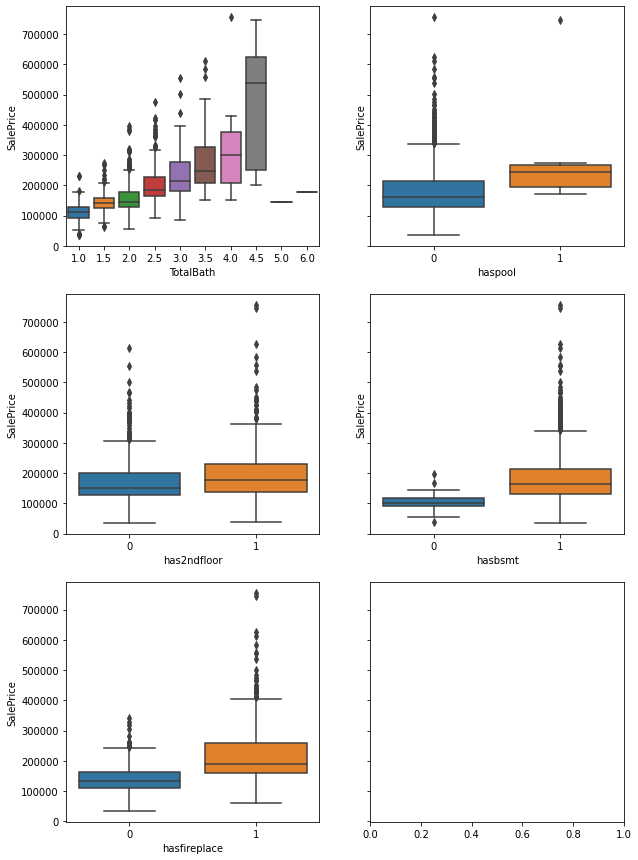

In [ ]:
l = 0
m = 0
train = Train_data.iloc[:len(y), :]
train = pd.concat([train,y],axis=1)
f, axes = plt.subplots(3,2,sharey=True,figsize=(10, 15))
for g in ['TotalBath', 'haspool','has2ndfloor','hasbsmt','hasfireplace']:
    fig = sns.boxplot(x=g, y="SalePrice", data=train, ax=axes[m,l])
    if l<1: l=l+1
    else: l=0;m=m+1

Plotting the newly created numerical variables w.r.t SalePrice

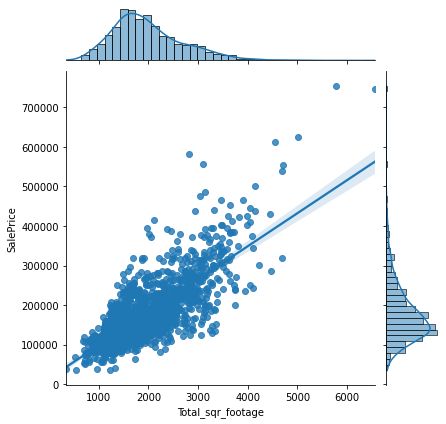

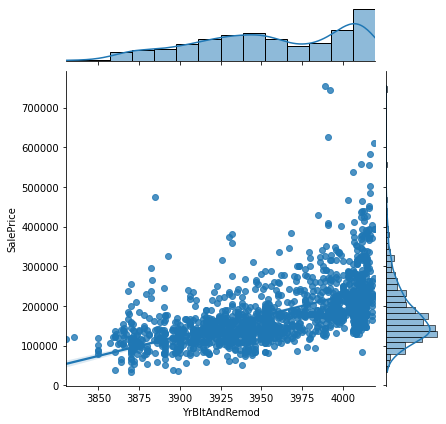

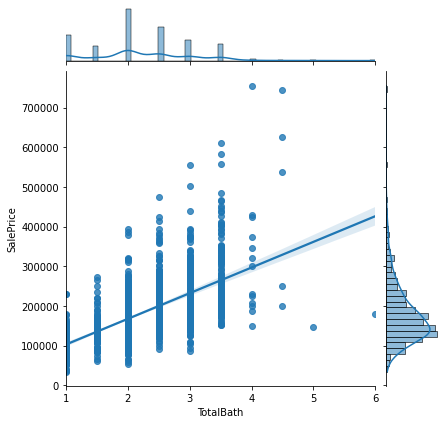

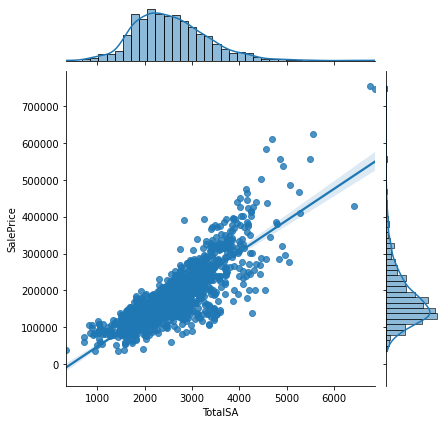

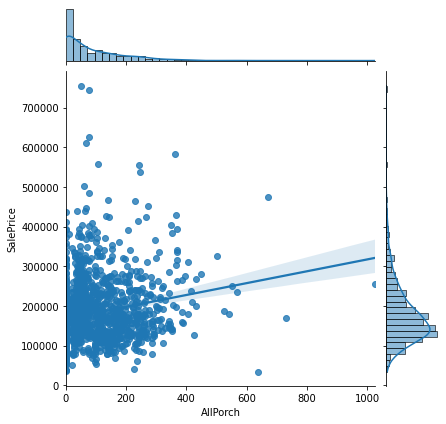

In [ ]:
Target = ['Total_sqr_footage','YrBltAndRemod','TotalBath','TotalSA','AllPorch']
for i in Target:
  data = pd.concat([train['SalePrice'], train[i]], axis=1)
  sns.jointplot(x=data[i], y=data['SalePrice'], kind='reg')

##Handling Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

Before handling skewness first we have to convert few numerical variables into categorical features 

In [ ]:
Train_data = Train_data.astype({'MSSubClass':object,'LotShape':object, 'BsmtExposure':object,'BsmtFinType1':object,
                              'BsmtFinType2':object, 'CentralAir':object,'MoSold':object, 'haspool':object,
                              'hasgarage':object,'OverallQual':object,'OverallCond':object,
                              'ExterQual':object, 'ExterCond':object, 'BsmtQual':object, 'BsmtCond':object,
                              'HeatingQC':object, 'KitchenQual':object, 'FireplaceQu':object,  'GarageQual':object,
                              'GarageCond':object,'has2ndfloor':object, 'hasbsmt':object, 'hasfireplace':object})

In [ ]:
Test_data = Test_data.astype({'MSSubClass':object,'LotShape':object, 'BsmtExposure':object,'BsmtFinType1':object,
                              'BsmtFinType2':object, 'CentralAir':object,'MoSold':object, 'haspool':object,
                              'hasgarage':object,'OverallQual':object,'OverallCond':object, 
                              'ExterQual':object, 'ExterCond':object, 'BsmtQual':object, 'BsmtCond':object,
                              'HeatingQC':object, 'KitchenQual':object, 'FireplaceQu':object,  'GarageQual':object,
                              'GarageCond':object,'has2ndfloor':object, 'hasbsmt':object, 'hasfireplace':object})

In [ ]:
cat_train = Train_data.select_dtypes(include=['object']).columns
num_train = Train_data.select_dtypes(include=['int64', 'float64']).columns

Id = Test_data.pop('Id')
cat_test = Test_data.select_dtypes(include=['object']).columns
num_test = Test_data.select_dtypes(include=['int64', 'float64']).columns

Numerical Features

In [ ]:
num_train

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'YrSold',
       'Total_sqr_footage', 'YrBltAndRemod', 'TotalBath', 'TotalSA',
       'AllPorch'],
      dtype='object')

Categorical Features

In [ ]:
cat_train

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition', 'haspool', 'has2ndfloor', 'hasbsmt',
       'hasfireplace', 'hasgarage'],
      dtype='object')

In [ ]:
# calculate skewness 
skewness = Train_data[num_train].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = skewness[abs(skewness) > 0.5]
print("There are {} numerical features with absolute Skew > 0.5 :".format(skewness.shape[0]))
skewness = pd.DataFrame({'Skew' :skewness})

skewness.head(20)

There are 17 numerical features with absolute Skew > 0.5 :


Skew
MiscVal            24.434913
PoolArea           15.932532
LotArea            12.560986
LowQualFinSF        8.995688
KitchenAbvGr        4.480268
BsmtFinSF2          4.247550
MasVnrArea          2.693554
AllPorch            2.009401
LotFrontage         1.546624
WoodDeckSF          1.544214
Total_sqr_footage   1.019762
GrLivArea           1.009951
BsmtUnfSF           0.919955
TotalSA             0.803494
BsmtFinSF1          0.764002
TotRmsAbvGrd        0.659822
Fireplaces          0.631409

In [ ]:
a = skewness.index.tolist()

In [ ]:
a[2]

'LotArea'

In [ ]:
bn2 = boxcox_normmax(Train_data['LotArea'],method='mle')

In [ ]:
bn2

0.04065702177861881

In [ ]:
b =Test_data

(array([ 63.,  74., 157., 625., 409.,  96.,  21.,   5.,   4.,   5.]),
 array([23.82182795, 29.06122021, 34.30061248, 39.54000475, 44.77939702,
        50.01878929, 55.25818155, 60.49757382, 65.73696609, 70.97635836,
        76.21575063]),
 <a list of 10 Patch objects>)

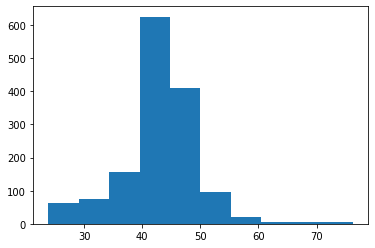

In [ ]:
plt.hist(Test_data['LotArea'])

2 11 

In [ ]:
b['LotArea'] = boxcox1p(b['LotArea'], boxcox_normmax(b['LotArea'],method='mle'))

(array([ 64.,  82., 229., 660., 318.,  74.,  19.,   4.,   4.,   5.]),
 array([ 32.71656499,  41.51440533,  50.31224567,  59.11008601,
         67.90792635,  76.70576669,  85.50360703,  94.30144737,
        103.0992877 , 111.89712804, 120.69496838]),
 <a list of 10 Patch objects>)

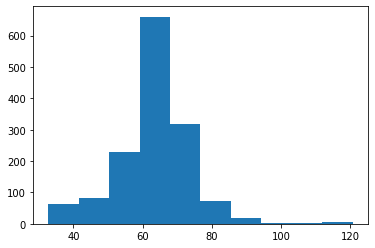

In [ ]:
plt.hist(b['LotArea'])

(array([  3.,   8.,  49., 283., 360., 467., 194.,  88.,   6.,   1.]),
 array([5.5339267 , 5.74006104, 5.94619538, 6.15232973, 6.35846407,
        6.56459842, 6.77073276, 6.97686711, 7.18300145, 7.3891358 ,
        7.59527014]),
 <a list of 10 Patch objects>)

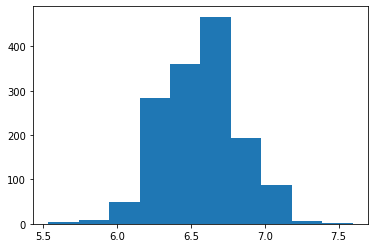

In [ ]:
plt.hist(Test_data['GrLivArea'])

In [ ]:
b['GrLivArea'] = boxcox1p(b['GrLivArea'], boxcox_normmax(b['GrLivArea'],method='mle'))

(array([  3.,   9.,  48., 285., 358., 468., 193.,  88.,   6.,   1.]),
 array([5.62583372, 5.8376511 , 6.04946848, 6.26128585, 6.47310323,
        6.68492061, 6.89673798, 7.10855536, 7.32037273, 7.53219011,
        7.74400749]),
 <a list of 10 Patch objects>)

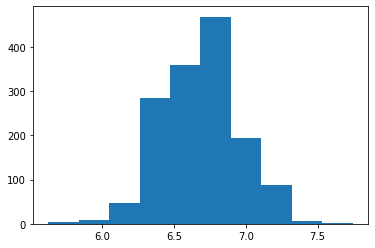

In [ ]:
plt.hist(b['GrLivArea'])

In [ ]:
Train_data.LotArea.describe()

count      1458.000000
mean      10459.936900
std        9859.198156
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

In [ ]:
Train_data.GrLivArea.describe()

count    1458.000000
mean     1510.465706
std       507.878508
min       334.000000
25%      1128.500000
50%      1461.500000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64

In [ ]:
# Box-Cox transformation
for i in skewness.index.tolist():
    Test_data[i] = boxcox1p(Test_data[i], boxcox_normmax(Test_data[i] + 1))
    

In [ ]:
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'GrLivArea', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'PoolArea', 'MiscVal',  'Total_sqr_footage', 'TotalSA', 'AllPorch']

The Box-Cox transformation transforms our data so that it closely resembles a normal distribution.

In [ ]:
# Box-Cox transformation
for i in ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'GrLivArea', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'PoolArea', 'MiscVal',  'Total_sqr_footage', 'TotalSA', 'AllPorch']:
    a[i] = boxcox1p(a[i], boxcox_normmax(a[i] + 1))
    

In [ ]:
Test_data.head()

Id MSSubClass MSZoning  ...  hasbsmt  hasfireplace hasgarage
0  1461         20       RH  ...        1             0         1
1  1462         20       RL  ...        1             0         1
2  1463         60       RL  ...        1             1         1
3  1464         60       RL  ...        1             1         1
4  1465        120       RL  ...        1             0         1

[5 rows x 70 columns]

In [ ]:
# Box-Cox transformation
for i in skewness.index.tolist():
    Test_data[i] = boxcox1p(Test_data[i], boxcox_normmax(Test_data[i] + 1))
    

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [ ]:
# Box-Cox transformation
for i in [	'TotalSA','BsmtFinSF1']:
    Train_data[i] = boxcox1p(Train_data[i], boxcox_normmax(Train_data[i] + 1))
    

In [ ]:
# Box-Cox transformation
for i in ['TotRmsAbvGrd','Fireplaces']:
    a[i] = boxcox1p(a[i], boxcox_normmax(a[i] + 1))

In [ ]:
# Box-Cox transformation
for i in ['PoolArea','LotArea']:
    Test_data[i] = boxcox1p(Test_data[i], boxcox_normmax(Test_data[i] + 1))

In [ ]:
Train_data.shape

(1458, 69)

##Dummy Variables

Performing one-hot encoding to all categorical variables

In [ ]:
Train_data = pd.get_dummies(Train_data).reset_index(drop=True)

In [ ]:
Test_data = pd.get_dummies(Test_data).reset_index(drop=True)

Dropping the variables that contain more than 99.9% zero's

In [ ]:
overfit_train = []
for i in Train_data.columns:
    counts = Train_data[i].value_counts()
    zeros = counts.iloc[0]
    if (zeros / len(Train_data) * 100) > 99.9:
        overfit_train.append(i)

overfit_train = list(overfit_train)
Train_data = Train_data.drop(overfit_train, axis=1)


In [ ]:
overfit_train

['Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Electrical_Mix',
 'Functional_Sev']

In [ ]:
overfit_test = []
for i in Test_data.columns:
    counts = Test_data[i].value_counts()
    zeros = counts.iloc[0]
    if (zeros / len(Test_data) * 100) > 99.9:
        overfit_test.append(i)

overfit_test = list(overfit_test)
Test_data = Test_data.drop(overfit_test, axis=1)

In [ ]:
overfit_test

['MSSubClass_150',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Stone',
 'Functional_Sev']

In [ ]:
Test_data.shape

(1459, 248)

In [ ]:
Train_data.shape

(1458, 252)

Dropping the colums in Test that are not in Train

In [ ]:
overfit = [f for f in Test_data.columns if f not in Train_data.columns]
Test_data = Test_data.drop(overfit, axis=1)

Dropping the colums in Train that are not in Test

In [ ]:
overfit = [f for f in Train_data.columns if f not in Test_data.columns]
Train_data = Train_data.drop(overfit, axis=1)

In [ ]:
Train_data.shape

(1458, 245)

In [ ]:
Test_data.shape

(1459, 245)

#MODELING

##Handling Outliers

'dataset_train' doesnt contain target variable, because we cant perform preprocessing on the Target varible.

But now we have to to combine dataset_train(Train data except target variable) and y(target variable) into X_Outliers.

The reason for combining is to removes outliers, such that we cant remove outliers seperately in Independent variables and Dependent variable.

In [ ]:
#Combing X and y to remove outliers

X_Outliers = pd.concat([Train_data,y],axis=1)
X_Outliers.head()

LotFrontage  LotArea  OverallQual  ...  hasfireplace_0  hasfireplace_1  SalePrice
0         65.0     8450            7  ...               1               0     208500
1         80.0     9600            6  ...               0               1     181500
2         68.0    11250            7  ...               0               1     223500
3         60.0     9550            7  ...               0               1     140000
4         84.0    14260            8  ...               0               1     250000

[5 rows x 246 columns]

In [ ]:
X_Outliers.shape

(1458, 246)

Here Z score 21 only gave affordable number of outliers that we can afford to lose in train data.

In [ ]:
#Calculating Z score for detecting outliners
from scipy import stats
z = np.abs(stats.zscore(X_Outliers))
print(z)
#Positions of Outliers
print(np.where(z > 21))


[[0.23233579 0.20393408 0.65850569 ... 1.05500876 1.05500876 0.34689629]
 [0.466541   0.08725172 0.06829317 ... 0.94785943 0.94785943 0.00713598]
 [0.09256043 0.08016212 0.65850569 ... 0.94785943 0.94785943 0.53565201]
 ...
 [0.185744   0.14386803 0.65850569 ... 0.94785943 0.94785943 1.07675175]
 [0.09256043 0.07538055 0.79509203 ... 1.05500876 1.05500876 0.48834779]
 [0.23358207 0.05305871 0.79509203 ... 1.05500876 1.05500876 0.42071032]]
(array([   5,    9,   39,  237,  246,  264,  326,  346,  410,  469,  598,
        761,  941,  955,  999, 1130, 1179, 1185, 1199, 1210, 1229, 1269]), array([161, 105, 188, 103, 188, 188, 224,  27, 130, 103,  72, 224, 229,
        72, 130, 229, 161, 105, 229, 161, 125, 125]))


We are assigning the variable X with train data but removing outliers, Z < 21

In [ ]:
#removing all Outliers
X = X_Outliers[(z < 21).all(axis=1)]
X.shape

(1436, 246)

##Log Distribution

Here we are popping the target variable "y" again from X(contains train data without outliers) because we have removed some samples as outliers and now we want the updated version of target variable "SalePrice"

In [ ]:
y = X.pop('SalePrice')

Converting the target variable 'y' into log distribution for better results. 

Traiming with these values is much easier for the model and also the error get reduced in the prediction

In [ ]:
y = np.log(y)
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1453    12.072541
1454    12.254863
1455    12.493130
1456    11.864462
1457    11.901583
Name: SalePrice, Length: 1436, dtype: float64

In [ ]:
y.shape

(1436,)

##Scaling

Both these sacaling and kfold are used in Error Calculation Function

In [ ]:
#Scaling
sc = StandardScaler()


In [ ]:
#K-Fold
kf = KFold(n_splits=5,shuffle=True, random_state=0)

The tarin_data is divided into train and test for modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y, test_size=0.3)

X_Test that was splitted from X is scaled using Standard Scaler

In [ ]:
X_Test1 = sc.fit_transform(X_Test)

In [ ]:
X_Train.shape

(1005, 245)

Creating objets of all the algorithms constructers that we are going to use

In [ ]:
#Linear Regression
regressor_lr = LinearRegression()

#Decision Tree
regressor_dt= DecisionTreeRegressor(random_state=0)

#Random Forest
regressor_rf = RandomForestRegressor(random_state=0)

#Ridge Regressor
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
regressor_rd = RidgeCV(alphas=alphas_alt, cv=kf, )

#Lasso Regressor
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
regressor_ls= LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf)

#Elastic Net Regressor
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
regressor_en = ElasticNetCV(max_iter=1e7, alphas=e_alphas,cv=kf, l1_ratio=e_l1ratio) 

#Support Vector Machine                         
regressor_svr =  SVR(C= 20, epsilon= 0.008, gamma=0.0003)

#Catboost
regressor_cgb = CatBoostRegressor(random_state=0, verbose=0)

#Gradient Boost
regressor_gbr = GradientBoostingRegressor( random_state =0)

#Light Gradient Boosting                                  
regressor_lgbm = LGBMRegressor(random_state=0)

#Xgboost                                      
regressor_xgb = XGBRegressor()

#Stacking Regressor
regressor_stack = StackingRegressor(regressors=(regressor_rd,regressor_ls,regressor_en, regressor_gbr, regressor_xgb, 
                                                regressor_lgbm,regressor_cgb),meta_regressor=regressor_cgb,
                                                use_features_in_secondary=True)

##Error Calculation Function

The main objective of this fuction is to calcute RMSE, MAE,  R2 for the various algorithms imported above.

In this function X_Train is further divided into X_train and X_val that too with the help of the K-Fold

In [ ]:

def calculate(algorithm, a,  b, c, d):
  alg_name = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST',
                                'R2_Train','R2_Val','R2_TEST'])

  # Iterate over each train-test split

  I=0
  for train_index, test_index in kf.split(a,b):
      I = I+1
      # Split train-test
      X_train, X_val = a.iloc[train_index], a.iloc[test_index]
      y_train ,y_val = b.iloc[train_index], b.iloc[test_index]
      X_train,X_val = sc.fit_transform(X_train),sc.transform(X_val)
      # Train the model
      model = algorithm.fit(X_train, y_train)

      y_pred_train = model.predict(X_train)
 
      #Evaluations on Train
      rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
      mae_train = mean_absolute_error(y_train,y_pred_train)
      r2_train = r2_score(y_train,y_pred_train)
      
      #Predicting Validation Data
      y_pred_val = model.predict(X_val)

      #Evaluations on Val
      rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
      mae_val = mean_absolute_error(y_val,y_pred_val)
      r2_val = r2_score(y_val,  y_pred_val)
      
      #Predicting Testing Data  
      y_pred_Test = model.predict(c)
      
      #Evaluations on Test
      rmse_Test = np.sqrt(mean_squared_error(d,y_pred_Test))
      mae_Test = mean_absolute_error(d,y_pred_Test)
      r2_Test = r2_score(d,y_pred_Test)

      alg_name = alg_name.append({'SPLITS':I,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                              'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)

  alg_name = alg_name.append({'SPLITS':"MEAN",
                         'RMSE_Train':alg_name.RMSE_Train.mean(),'RMSE_Val':alg_name.RMSE_Val.mean(),
                         'MAE_Train':alg_name.MAE_Train.mean(),'MAE_Val':alg_name.MAE_Val.mean(),
                         'R2_Train':alg_name.R2_Train.mean(),'R2_Val':alg_name.R2_Val.mean(),
                        'RMSE_TEST':alg_name.RMSE_TEST.mean(),'MAE_TEST':alg_name.MAE_TEST.mean(),
                        'R2_TEST':alg_name.MAE_TEST.mean()}, ignore_index=True)   



  # Set name of the classifiers as index labels
  alg_name.set_index('SPLITS', inplace=True)
  
  return alg_name


##Linear Regression

In [ ]:
#Linear Regression
Lin_Reg = calculate(regressor_lr,X_Train,y_Train,X_Test1, y_Test)
print('LINEAR REGRESSION \n')
Lin_Reg


LINEAR REGRESSION 



RMSE_Train      RMSE_Val  ...        R2_Val       R2_TEST
SPLITS                            ...                            
1.0       0.078565  4.259093e+08  ... -1.153250e+18 -9.193273e+19
2.0       0.081329  1.386988e-01  ...  8.636381e-01 -2.855089e+20
3.0       0.081054  2.440658e+09  ... -3.679012e+19 -7.042019e+21
4.0       0.086130  1.654791e+10  ... -1.910323e+21 -1.538603e+21
5.0       0.084257  7.692695e+08  ... -3.549851e+18 -2.492998e+21
MEAN      0.082267  4.036749e+09  ... -3.903632e+20  9.394748e+09

[6 rows x 9 columns]

Validation and Test scores are very high, so Linear Regression can't use to predict the values


##Decision TRee

Tuning Decision Tree with Random Search

In [ ]:

distributions = dict(max_depth = np.linspace(1, 32, 32, endpoint=True),
                     min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True),
                     min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True),
                     max_features = list(range(1,dataset_train.shape[1])))
reg = RandomizedSearchCV(regressor_dt, distributions, random_state=0)
search = reg.fit(X_Train,y_train)
search.best_params_

In [ ]:
regressor_dt= DecisionTreeRegressor(max_depth=12,max_features=187,min_samples_leaf=0.2,min_samples_split=0.6,
                                    random_state=0)

In [ ]:
#Decision Tree
Dec_Tree = calculate(regressor_dt,X_Train,y_Train,X_Test1,y_Test)
print('DECISION TREE \n')
Dec_Tree

DECISION TREE 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.255204  0.271203   0.267256  ...  0.575896  0.532397  0.577502
2.0       0.309233  0.306627   0.333064  ...  0.393205  0.333547  0.343814
3.0       0.309636  0.322214   0.326553  ...  0.370796  0.358782  0.369219
4.0       0.308850  0.308692   0.339377  ...  0.391740  0.335230  0.318703
5.0       0.284540  0.301422   0.323858  ...  0.464548  0.454990  0.379590
MEAN      0.293493  0.302032   0.318022  ...  0.439237  0.402989  0.239005

[6 rows x 9 columns]

##SVR

In [ ]:
#SVR
SVR = calculate(regressor_svr,X_Train,y_Train,X_Test1,y_Test)
print('SVR \n')
SVR

SVR 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.041617  0.125859   0.124536  ...  0.988722  0.899294  0.908260
2.0       0.052414  0.128909   0.137759  ...  0.982567  0.882208  0.887744
3.0       0.047876  0.121488   0.122742  ...  0.984958  0.908844  0.910884
4.0       0.052089  0.102331   0.122430  ...  0.982699  0.926948  0.911337
5.0       0.052545  0.107495   0.129252  ...  0.981740  0.930685  0.901180
MEAN      0.049308  0.117216   0.127344  ...  0.984137  0.909596  0.082851

[6 rows x 9 columns]

##Random Forest

In [ ]:
#RANDOM FOREST
Ran_Frst = calculate(regressor_rf,X_Train,y_Train,X_Test1,y_Test)
print('RANDOM FOREST \n')
Ran_Frst

RANDOM FOREST 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.049477  0.134746   0.152282  ...  0.984059  0.884569  0.862828
2.0       0.050009  0.134761   0.150531  ...  0.984130  0.871272  0.865964
3.0       0.047633  0.141959   0.150703  ...  0.985109  0.875536  0.865658
4.0       0.051888  0.117576   0.147938  ...  0.982832  0.903560  0.870542
5.0       0.049771  0.125661   0.148478  ...  0.983617  0.905277  0.869596
MEAN      0.049756  0.130941   0.149986  ...  0.983950  0.888043  0.098684

[6 rows x 9 columns]

##Ridge Regressor

In [ ]:
#RIDGE
RIDGE = calculate(regressor_rd,X_Train,y_Train,X_Test1,y_Test)
print('RIDGE \n')
RIDGE

RIDGE 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.079717  0.137506   0.125768  ...  0.958619  0.879792  0.906435
2.0       0.082277  0.131427   0.138941  ...  0.957043  0.877562  0.885808
3.0       0.081876  0.130186   0.129138  ...  0.956005  0.895325  0.901355
4.0       0.087080  0.104874   0.127291  ...  0.951646  0.923272  0.904155
5.0       0.085388  0.129678   0.139474  ...  0.951780  0.899124  0.884931
MEAN      0.083268  0.126734   0.132123  ...  0.955019  0.895015  0.087572

[6 rows x 9 columns]

##LASSO Regressor

In [ ]:
#LASSO
LASSO = calculate(regressor_ls,X_Train,y_Train,X_Test1,y_Test)
print('LASSO \n')
LASSO

LASSO 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.081982  0.131463   0.123030  ...  0.956234  0.890125  0.910466
2.0       0.084540  0.123413   0.134656  ...  0.954649  0.892038  0.892745
3.0       0.083760  0.124912   0.126716  ...  0.953957  0.903633  0.905020
4.0       0.089136  0.099197   0.123344  ...  0.949336  0.931354  0.910008
5.0       0.087967  0.116768   0.134773  ...  0.948824  0.918210  0.892557
MEAN      0.085477  0.119151   0.128504  ...  0.952600  0.907072  0.084612

[6 rows x 9 columns]

##ELASTIC NET Regressor

In [ ]:
#ELASTIC NET
ELASTIC_NET = calculate(regressor_en,X_Train,y_Train,X_Test1,y_Test)
print('ELASTIC_NET \n')
ELASTIC_NET

ELASTIC_NET 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.081595  0.132048   0.123280  ...  0.956647  0.889145  0.910101
2.0       0.084171  0.124189   0.134992  ...  0.955044  0.890677  0.892208
3.0       0.083414  0.125497   0.126917  ...  0.954337  0.902728  0.904718
4.0       0.088824  0.099623   0.123596  ...  0.949690  0.930763  0.909640
5.0       0.087522  0.118832   0.135409  ...  0.949340  0.915292  0.891541
MEAN      0.085105  0.120038   0.128839  ...  0.953012  0.905721  0.084882

[6 rows x 9 columns]

##GBR Regressor

 Let's try Bayesian Optimization for Tuning
 

In [ ]:
params = dict(loss=['ls', 'lad', 'huber', 'quantile'], 
                     learning_rate = np.linspace(0.001, 1.0, 10, endpoint=True),
                     n_estimators = list(range(50,5000)),
                     subsample = np.linspace(0.5, 1.0, 5, endpoint=True), 
                     #min_samples_split = np.linspace(2, 32, 32, endpoint=True),
                     #min_samples_leaf = np.linspace(2, 15, 15, endpoint=True),
                     max_depth = np.linspace(1, 10, 10, endpoint=True),
                    max_features = ['auto', 'sqrt', 'log2']
    
)


bayes=BayesSearchCV(estimator=GradientBoostingRegressor(),
                    search_spaces=params,n_iter=50,cv=5, random_state=0)
res=bayes.fit(X_Train,y_Train)
print(res.best_params_)

In [ ]:
regressor_gbr = GradientBoostingRegressor(n_estimators=816, learning_rate=0.112,max_depth=2, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=10,subsample = 0.625, loss='lad', random_state =0)

In [ ]:
#GBR
GBR = calculate(regressor_gbr,X_Train,y_Train,X_Test1,y_Test)
print('GBR \n')
GBR

GBR 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.078193  0.121952   0.139041  ...  0.960186  0.905449  0.885645
2.0       0.081416  0.114072   0.137986  ...  0.957938  0.907763  0.887374
3.0       0.081649  0.126641   0.138165  ...  0.956249  0.900948  0.887081
4.0       0.087569  0.104049   0.140532  ...  0.951101  0.924474  0.883179
5.0       0.084553  0.110436   0.136932  ...  0.952719  0.926839  0.889088
MEAN      0.082676  0.115430   0.138531  ...  0.955639  0.913095  0.087888

[6 rows x 9 columns]

With the second time tuning results

In [ ]:
regressor_gbr = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', 
                                          min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)

In [ ]:
#GBR
GBR = calculate(regressor_gbr,X_Train,y_Train,X_Test1,y_Test)
print('GBR \n')
GBR

GBR 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.046484  0.117965   0.134856  ...  0.985930  0.911530  0.892425
2.0       0.052523  0.113059   0.133536  ...  0.982495  0.909393  0.894521
3.0       0.056219  0.120247   0.131558  ...  0.979258  0.910697  0.897623
4.0       0.058415  0.099091   0.131155  ...  0.978241  0.931500  0.898248
5.0       0.057369  0.109105   0.133008  ...  0.978234  0.928593  0.895353
MEAN      0.054202  0.111893   0.132823  ...  0.980831  0.918343  0.082050

[6 rows x 9 columns]

##XGBoost

 Let's try Bayesian Optimization for Tuning

In [ ]:
params = dict(eta = np.linspace(0.001, 1.0, 100, endpoint=True),
                     n_estimators = list(range(100,5000)),
                     max_depth = list(range(1,15)),
                     subsample = np.linspace(0.5, 1.0, 10, endpoint=True),
                     colsample_bytree = np.linspace(0.5, 1.0, 10, endpoint=True))

bayes=BayesSearchCV(estimator=XGBRegressor(),
                    search_spaces=params,n_iter=50,cv=5,random_state=0)
res=bayes.fit(x_train,y_train)
print(res.best_params_)

In [ ]:
regressor_xgb = XGBRegressor(learning_rate=0.01,eta = 0.567, n_estimators=1367, max_depth=3, min_child_weight=0, gamma=0, 
                             subsample=0.8334,colsample_bytree=0.5,objective='reg:linear', nthread=-1,scale_pos_weight=1,
                             eed=27,reg_alpha=0.00006)

In [ ]:
#XGBOOST
XGBOOST = calculate(regressor_xgb,X_Train,y_Train,X_Test1,y_Test)
print('XGBOOST \n')
XGBOOST

[05:55:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.064846  0.115038   0.125892  ...  0.973147  0.902829  0.908434
2.0       0.068131  0.098941   0.126055  ...  0.970042  0.930958  0.908197
3.0       0.067383  0.106038   0.126706  ...  0.970236  0.926155  0.907247
4.0       0.066928  0.102469   0.126105  ...  0.971168  0.925491  0.908124
5.0       0.063871  0.143488   0.130313  ...  0.971482  0.891839  0.901890
MEAN      0.066232  0.113195   0.127014  ...  0.971215  0.915454  0.083393

[6 rows x 9 columns]

In [ ]:
regressor_xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)



In [ ]:
#XGBOOST
XGBOOST = calculate(regressor_xgb,X_Train,y_Train,X_Test1,y_Test)
print('XGBOOST \n')
XGBOOST

[06:13:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:14:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.033467  0.118589   0.134388  ...  0.992706  0.910592  0.893171
2.0       0.033628  0.117585   0.138159  ...  0.992824  0.901994  0.887091
3.0       0.034025  0.129304   0.136502  ...  0.992402  0.896737  0.889783
4.0       0.035631  0.099574   0.134058  ...  0.991904  0.930831  0.893694
5.0       0.034205  0.098038   0.135513  ...  0.992262  0.942345  0.891374
MEAN      0.034191  0.112618   0.135724  ...  0.992420  0.916500  0.085455

[6 rows x 9 columns]

##LGBM Regressor

Tuning with Random Search

In [ ]:

distributions = dict(
    
boosting_type =['gbdt','dart','goss', 'rf'],

num_leaves = list(range(2,50)),

learning_rate =np.linspace(0.001,1.0,10,endpoint=True),

n_estimators = list(range(50,5000)),

bagging_fraction = np.linspace(0.001,1.0,10,endpoint=True),

subsample = np.linspace(0.5,1.0,10,endpoint=True),

colsample_bytree = np.linspace(0.5,1.0,10,endpoint=True))

reg = RandomizedSearchCV(regressor_lgbm, distributions, random_state=0)
search = reg.fit(x_train,y_train)
search.best_params_

In [ ]:

regressor_lgbm = LGBMRegressor(objective='regression', num_leaves=4,learning_rate=0.01, n_estimators=5000,max_bin=200, 
                              bagging_fraction=0.75,bagging_freq=5,bagging_seed=7,feature_fraction=0.2,
                              feature_fraction_seed=7,verbose=-1)



In [ ]:
#LGBM
LGBM = calculate(regressor_lgbm,X_Train,y_Train,X_Test1,y_Test)         
print('LGBM \n')
LGBM

LGBM 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.064372  0.116858   0.129633  ...  0.973538  0.899731  0.902911
2.0       0.068420  0.102885   0.129916  ...  0.969788  0.925344  0.902488
3.0       0.067909  0.105340   0.128022  ...  0.969769  0.927125  0.905309
4.0       0.068184  0.103887   0.131475  ...  0.970076  0.923415  0.900132
5.0       0.061009  0.146435   0.130522  ...  0.973981  0.887351  0.901575
MEAN      0.065979  0.115081   0.129914  ...  0.971430  0.912593  0.081675

[6 rows x 9 columns]

Tuning with Bayes Search

In [ ]:
params = dict(
    
boosting_type =['gbdt','dart','goss'],

num_leaves = list(range(2,50)),

learning_rate =np.linspace(0.001,1.0,10,endpoint=True),

n_estimators = list(range(50,5000)),

bagging_fraction = np.linspace(0.001,0.99,10,endpoint=True),

subsample = np.linspace(0.5,1.0,10,endpoint=True),

colsample_bytree = np.linspace(0.5,1.0,10,endpoint=True))


bayes=BayesSearchCV(estimator=LGBMRegressor(),
                    search_spaces=params,n_iter=50,cv=5, random_state=0)
res=bayes.fit(x_train,y_train)
print(res.best_params_)

In [ ]:
regressor_lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=9000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, 
                                       feature_fraction_seed=7,
                                       verbose=-1)

In [ ]:
#LGBM
LGBM = calculate(regressor_lgbm,X_Train,y_Train,X_Test1,y_Test)         
print('LGBM \n')
LGBM

LGBM 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.048110  0.124733   0.139045  ...  0.984928  0.901088  0.885638
2.0       0.050195  0.113651   0.142475  ...  0.984012  0.908442  0.879926
3.0       0.049336  0.121257   0.133124  ...  0.984026  0.909190  0.895171
4.0       0.052759  0.097958   0.137754  ...  0.982250  0.933058  0.887751
5.0       0.049485  0.111324   0.140972  ...  0.983805  0.925658  0.882447
MEAN      0.049977  0.113785   0.138674  ...  0.983804  0.915487  0.088490

[6 rows x 9 columns]

Random Search is doing better so lets take that results to the final.

##Cat BOOST

In [ ]:
#Cat_Boost
Cat_Boost = calculate(regressor_cgb,X_Train,y_Train,X_Test1,y_Test)         
print('Cat_Boost \n')
Cat_Boost 

Cat_Boost 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.026542  0.123366   0.129614  ...  0.995412  0.903244  0.900625
2.0       0.028358  0.113233   0.134772  ...  0.994897  0.909115  0.892560
3.0       0.028181  0.125962   0.132383  ...  0.994788  0.902006  0.896334
4.0       0.029764  0.097573   0.128018  ...  0.994351  0.933583  0.903057
5.0       0.028614  0.102302   0.126788  ...  0.994585  0.937221  0.904911
MEAN      0.028292  0.112487   0.130315  ...  0.994807  0.917034  0.081864

[6 rows x 9 columns]

##Results

In [ ]:
Results = pd.DataFrame(columns=['RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST','R2_Train','R2_Val','R2_TEST'])

#Results = Results.append(Lin_Reg.loc['MEAN'], ignore_index=False)
Results = Results.append(Dec_Tree.loc['MEAN'], ignore_index=False)

Results = Results.append(SVR.loc['MEAN'], ignore_index=False)

Results = Results.append(Ran_Frst.loc['MEAN'], ignore_index=False)
Results = Results.append(RIDGE.loc['MEAN'], ignore_index=False)
Results = Results.append(LASSO.loc['MEAN'], ignore_index=False)
Results = Results.append(ELASTIC_NET.loc['MEAN'], ignore_index=False)
Results = Results.append(GBR.loc['MEAN'], ignore_index=False)
Results = Results.append(XGBOOST.loc['MEAN'], ignore_index=False)
Results = Results.append(LGBM.loc['MEAN'], ignore_index=False)
Results = Results.append(Cat_Boost.loc['MEAN'], ignore_index=False)

Results.set_axis(['DECISION TREE','SVR','RANDOM FOREST','RIDGE','LASSO','ELASTIC_NET','GBR','XGBOOST','LGBM','CATBOOST'])


RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
DECISION TREE    0.293493  0.302032   0.318022  ...  0.439237  0.402989  0.239005
SVR              0.049308  0.117216   0.127344  ...  0.984137  0.909596  0.082851
RANDOM FOREST    0.049756  0.130941   0.149986  ...  0.983950  0.888043  0.098684
RIDGE            0.083268  0.126734   0.132123  ...  0.955019  0.895015  0.087572
LASSO            0.085477  0.119151   0.128504  ...  0.952600  0.907072  0.084612
ELASTIC_NET      0.085105  0.120038   0.128839  ...  0.953012  0.905721  0.084882
GBR              0.054202  0.111893   0.132823  ...  0.980831  0.918343  0.082050
XGBOOST          0.034191  0.112618   0.135724  ...  0.992420  0.916500  0.085455
LGBM             0.049977  0.113785   0.138674  ...  0.983804  0.915487  0.088490
CATBOOST         0.028292  0.112487   0.130315  ...  0.994807  0.917034  0.081864

[10 rows x 9 columns]

##STACKING Regressor

The underlying principle of ensemble methods is that there is a strength to be found in unity. By combining multiple methods, each with its own pros and cons, more powerful models can be created.

Stacking is a technique that takes several regression or classification models and uses their output as the input for the meta-classifier/regressor.

In its essence, stacking is an ensemble learning technique much like Random Forests where the quality of prediction is improved by combining, typically, weak models.

In [ ]:
regressor_stack = StackingRegressor(regressors=(regressor_svr,regressor_rd,regressor_ls,regressor_en, regressor_gbr, regressor_xgb, 
                                                regressor_lgbm,regressor_cgb),meta_regressor=regressor_cgb,
                                                use_features_in_secondary=True)

In [ ]:
#STACK
STACK = calculate(regressor_stack,X_Train,y_Train,X_Test1,y_Test)         
print('STACK \n')
STACK

[05:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
STACK 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.012202  0.105600   0.110393  ...  0.999050  0.918576  0.929301
2.0       0.010923  0.118617   0.118087  ...  0.999194  0.918044  0.919102
3.0       0.012727  0.104048   0.112778  ...  0.998947  0.925394  0.926212
4.0       0.011863  0.114991   0.113587  ...  0.999077  0.913639  0.925150
5.0       0.011681  0.113284   0.112834  ...  0.999106  0.916299  0.926139
MEAN      0.011879  0.111308   0.113536  ...  0.999075  0.918390  0.079854

[6 rows x 9 columns]

Stacking Without K-Fold

In [ ]:
X_Train_Stack,X_val_Stack,y_Train_Stack,y_val_Stack = train_test_split(X_Train,y_Train, test_size=0.3)

In [ ]:
#STACK  

STACK = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST',
                                'R2_Train','R2_Val','R2_TEST'])
# Iterate over each train-test split
X_Train_Stack1,X_val_Stack1 = sc.fit_transform(X_Train_Stack),sc.transform(X_val_Stack)
# Train the model
model = regressor_stack.fit(X_Train_Stack1, y_Train_Stack)

y_pred_train = model.predict(X_Train_Stack1)

#Evaluations on Train
rmse_train = np.sqrt(mean_squared_error(y_Train_Stack,y_pred_train))
mae_train = mean_absolute_error(y_Train_Stack,y_pred_train)
r2_train = r2_score(y_Train_Stack,y_pred_train)
#Predicting Validation Data
y_pred_val = model.predict(X_val_Stack1)

#Evaluations on Test
rmse_val = np.sqrt(mean_squared_error(y_val_Stack,y_pred_val))
mae_val = mean_absolute_error(y_val_Stack,y_pred_val)
r2_val = r2_score(y_val_Stack,  y_pred_val)

X_Test2=sc.transform(X_Test)
y_pred_Test = model.predict(X_Test2)
      
#Evaluations on Test
rmse_Test = np.sqrt(mean_squared_error(y_Test,y_pred_Test))
mae_Test = mean_absolute_error(y_Test,y_pred_Test)
r2_Test = r2_score(y_Test,y_pred_Test)
#Creating a RESULTS datafram
STACK = STACK.append({'SPLITS':1,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                              'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)


# Set name of the classifiers as index labels
STACK.set_index('SPLITS', inplace=True)
print('STACK \n')
STACK

[06:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
STACK 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.010219  0.109358   0.129535  ...  0.999303  0.926115  0.900747

[1 rows x 9 columns]

In [ ]:
Results = Results.append(STACK.iloc[0], ignore_index=False)
Results.set_axis(['DECISION TREE','SVR','RANDOM FOREST','RIDGE','LASSO','ELASTIC_NET','GBR','XGBOOST','LGBM','Cst_Boost',"STACK"])

RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
DECISION TREE    0.304458  0.309791   0.305985  ...  0.402099  0.382729  0.240654
SVR              0.046392  0.121168   0.118251  ...  0.986169  0.904680  0.083861
RANDOM FOREST    0.051002  0.135639   0.131831  ...  0.983308  0.881112  0.093363
RIDGE            0.083425  0.121782   0.124818  ...  0.955379  0.903348  0.089858
LASSO            0.084809  0.116251   0.121746  ...  0.953881  0.912114  0.086597
ELASTIC_NET      0.084522  0.116889   0.122217  ...  0.954193  0.911127  0.086976
GBR              0.059221  0.117196   0.117316  ...  0.977518  0.911419  0.080630
XGBOOST          0.035453  0.115471   0.112802  ...  0.991939  0.913598  0.077595
LGBM             0.052994  0.122048   0.121419  ...  0.982006  0.903947  0.084819
Cst_Boost        0.027037  0.115669   0.113183  ...  0.995298  0.913535  0.079059
STACK            0.009941  0.107307   0.114001  ...  0.999390  0.919035  0.920817

[11 rows x 9 columns]

##BLENDING




Blending is combining the predictions of different algorithms that performed well manually.

Here whichever wights provide better result on validation we will try that on our real test data and submit the prediction.

Using Dirichilets distribution to prodoce different weights for blending models

In [ ]:
rd = np.random.dirichlet((9, 8, 7, 6, 5, 4, 3, 2, 1), 100) 


Converting the weights or blending into an Datarame for better understanding

In [ ]:
a = rd
a = pd.DataFrame(a)
a

0         1         2  ...         6         7         8
0   0.195000  0.232482  0.130860  ...  0.014948  0.007142  0.006698
1   0.249821  0.148174  0.138703  ...  0.048835  0.011814  0.021401
2   0.235941  0.171085  0.135613  ...  0.056088  0.093179  0.006754
3   0.239457  0.145161  0.211039  ...  0.085396  0.034757  0.008825
4   0.171586  0.225523  0.103464  ...  0.156969  0.037413  0.028004
..       ...       ...       ...  ...       ...       ...       ...
95  0.187294  0.088180  0.219946  ...  0.073693  0.022621  0.073760
96  0.239091  0.175756  0.109543  ...  0.084566  0.099957  0.015085
97  0.200909  0.203094  0.122842  ...  0.044636  0.083855  0.003413
98  0.299725  0.158406  0.117170  ...  0.072562  0.028749  0.001908
99  0.221473  0.172560  0.139268  ...  0.037368  0.039916  0.010078

[100 rows x 9 columns]

Another set of weights with a different distribution

In [ ]:
uf = np.random.dirichlet((1,1,1,1,1,1,1,1,1), 100) 

Converting the weights or blending into an Datarame for better understanding

In [ ]:
b = uf
b = pd.DataFrame(b)
b

0         1         2  ...         6         7         8
0   0.028552  0.148761  0.192652  ...  0.174618  0.177879  0.013417
1   0.159390  0.099073  0.200721  ...  0.146909  0.070252  0.189788
2   0.079995  0.163832  0.016505  ...  0.022590  0.261167  0.049193
3   0.007509  0.061694  0.167247  ...  0.110507  0.054623  0.083359
4   0.015284  0.057771  0.089307  ...  0.280176  0.164678  0.136983
..       ...       ...       ...  ...       ...       ...       ...
95  0.204666  0.106342  0.128776  ...  0.200462  0.039026  0.045452
96  0.299082  0.044800  0.147257  ...  0.085593  0.022419  0.183651
97  0.031608  0.025983  0.256034  ...  0.363364  0.094786  0.010375
98  0.357035  0.247852  0.015292  ...  0.074392  0.060571  0.003503
99  0.013474  0.225827  0.166365  ...  0.007538  0.159739  0.130133

[100 rows x 9 columns]

Checking whether the sum of weights are 1 or not

In [ ]:
for i in range(10):
  z = 0
  for x in rd[i]:
    z = z+x
  print(z)

0.9999999999999999
1.0
0.9999999999999999
0.9999999999999998
1.0
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999


In [ ]:
rd[0]

array([0.19500005, 0.2324821 , 0.13086026, 0.05355006, 0.15909638,
       0.2002231 , 0.01494761, 0.00714246, 0.00669797])

In [ ]:
rd[0][0]

0.19500005329147616

Visulaizing the weights for better understanding

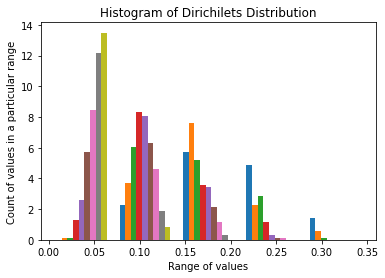

In [ ]:
plt.hist(rd , 5, density = True) 
plt.xlabel('Range of values')
plt.ylabel('Count of values in a particular range')
plt.title('Histogram of Dirichilets Distribution')
plt.show()


rd weights are more random

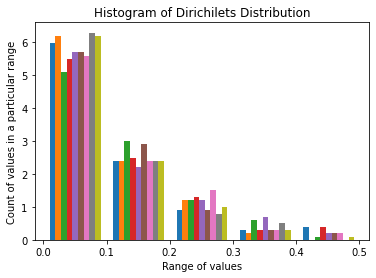

In [ ]:
plt.hist(uf, 5, density = True) 
plt.xlabel('Range of values')
plt.ylabel('Count of values in a particular range')
plt.title('Histogram of Dirichilets Distribution')
plt.show()


uf distribution is more different than rd, lets try these and see how they yeild.

##Blending_RD

Blending is the manual combination of the predictions of different algorithms that performed well .

Is is an ensemble method that is the collection of all well performed algorithms.

Here whichever weights provide better result on validation we will try that on our real test data and submit the prediction.

Here the weights are produced by the dirichlrts distribution 

Error in the prediction of each algorithm will be reduced by the percentage of the weights that are assingned to each algorithm

In [ ]:
Blends_MEAN_RD = pd.DataFrame(columns=['RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST','R2_Train','R2_Val','R2_TEST'])
for i in range(100):
  def blend_models_predict(X):
      return  ((rd[i][0] * regressor_rd.predict(X)) +\
              (rd[i][1] * regressor_rd.predict(X)) +\
              (rd[i][2] * regressor_ls.predict(X)) +\
              (rd[i][3] * regressor_en.predict(X)) +\
              (rd[i][4] * regressor_gbr.predict(X)) +\
              (rd[i][5] * regressor_xgb.predict(X)) +\
              (rd[i][6] * regressor_lgbm.predict(X)) +\
              (rd[i][7] * regressor_cgb.predict(X)) +\
              (rd[i][8] * regressor_stack.predict(np.array(X))))
      
      
  #BLENDING
  # KFold Cross Validation approach
  kf = KFold(n_splits=5,shuffle=True)
  kf.split(X)    
     
  # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

  Blend = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST','R2_Train','R2_Val','R2_TEST'])
  # Iterate over each train-test split
  I=0
  for train_index, test_index in kf.split(X_Train,y_Train):
    I = I+1
    # Split train-test
    X_train, X_val = X_Train.iloc[train_index], X_Train.iloc[test_index]
    y_train ,y_val = y_Train.iloc[train_index], y_Train.iloc[test_index]
    X_train,X_val = sc.fit_transform(X_train),sc.transform(X_val)
    

    y_pred_train = blend_models_predict(X_train)

    #Evaluations on Train
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    mae_train = mean_absolute_error(y_train,y_pred_train)
    r2_train = r2_score(y_train,y_pred_train)
    
    #Predicting Validation Data
    y_pred_val = blend_models_predict(X_val)

    #Evaluations on Val
    rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
    mae_val = mean_absolute_error(y_val,y_pred_val)
    r2_val = r2_score(y_val,  y_pred_val)

    y_pred_Test = blend_models_predict(X_Test1)
    
    #Evaluations on Test
    rmse_Test = np.sqrt(mean_squared_error(y_Test,y_pred_Test))
    mae_Test = mean_absolute_error(y_Test,y_pred_Test)
    r2_Test = r2_score(y_Test,y_pred_Test)

    #Creating a RESULTS dataframe
    Blend = Blend.append({'SPLITS':I,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                               'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)
    

  Blend = Blend.append({'SPLITS':"MEAN",
                          'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                          'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                          'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                          'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                        'R2_TEST':Blend.MAE_TEST.mean()} , ignore_index=True) 
  

  Blends_MEAN_RD = Blends_MEAN_RD.append({
                         'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                         'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                         'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                         'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                         'R2_TEST':Blend.MAE_TEST.mean() }, ignore_index=True) 


  # Set name of the classifiers as index labels
  Blend.set_index('SPLITS', inplace=True)
  print('Blending Iteration :',i,'\n')
  print(rd[i],'\n')
  print(Blend)
  print('='*100)

Blending Iteration : 0 

[0.11007162 0.24407206 0.18229566 0.10557632 0.05746544 0.16363678
 0.07027119 0.04119048 0.02542044] 

        RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.075484  0.063820   0.121844  ...  0.964034  0.977251  0.900856
2.0       0.071867  0.078603   0.121844  ...  0.968018  0.962724  0.900856
3.0       0.074022  0.070182   0.121844  ...  0.967282  0.964987  0.900856
4.0       0.073539  0.077035   0.121844  ...  0.967289  0.960159  0.900856
5.0       0.072931  0.075230   0.121844  ...  0.966692  0.967298  0.900856
MEAN      0.073569  0.072974   0.121844  ...  0.966663  0.966484  0.079954

[6 rows x 9 columns]
Blending Iteration : 1 

[0.16065683 0.06104473 0.23064651 0.18235128 0.11701738 0.09871558
 0.05957604 0.08269356 0.0072981 ] 

        RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ... 

In [ ]:
Blends_MEAN_RD

RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
0     0.073569  0.072974   0.121844  ...  0.966663  0.966484  0.079954
1     0.073615  0.073164   0.120991  ...  0.966636  0.966767  0.079439
2     0.076453  0.076058   0.121760  ...  0.963908  0.962817  0.079875
3     0.073428  0.072588   0.120529  ...  0.966794  0.967021  0.078687
4     0.074215  0.073555   0.121358  ...  0.966068  0.966166  0.079463
..         ...       ...        ...  ...       ...       ...       ...
95    0.077176  0.077027   0.122752  ...  0.963317  0.962789  0.080844
96    0.071446  0.071246   0.120507  ...  0.968538  0.967825  0.078535
97    0.076375  0.076459   0.122294  ...  0.964059  0.963062  0.080362
98    0.073574  0.073999   0.121629  ...  0.966652  0.965494  0.079862
99    0.075987  0.075858   0.122550  ...  0.964409  0.963620  0.080561

[100 rows x 9 columns]

The weights in rd distribution that gave least validation error.

In [ ]:
print(Blends_MEAN_RD[Blends_MEAN_RD.RMSE_Val == Blends_MEAN_RD.RMSE_Val.min()]) 

    RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
73    0.069635  0.069615    0.12069  ...  0.970112  0.969575  0.078867

[1 rows x 9 columns]


The weights in rd distribution that gave least test error.

In [ ]:
print(Blends_MEAN_RD[Blends_MEAN_RD.RMSE_TEST == Blends_MEAN_RD.RMSE_TEST.min()]) 

    RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
58    0.070012  0.069731   0.120384  ...  0.969835  0.969977  0.078516

[1 rows x 9 columns]


In [ ]:
rd[13]

array([0.19059811, 0.1990148 , 0.07295346, 0.04644475, 0.25793577,
       0.04459777, 0.09388639, 0.06015315, 0.0344158 ])

##Blending_UF

Now lets try uf distribution weights to perform blending

In [ ]:
Blends_MEAN_UF = pd.DataFrame(columns=['RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST','R2_Train','R2_Val','R2_TEST'])
for i in range(100):
  def blend_models_predict(X):
      return  ((uf[i][0] * regressor_rd.predict(X)) +\
              (uf[i][1] * regressor_rd.predict(X)) +\
              (uf[i][2] * regressor_ls.predict(X)) +\
              (uf[i][3] * regressor_en.predict(X)) +\
              (uf[i][4] * regressor_gbr.predict(X)) +\
              (uf[i][5] * regressor_xgb.predict(X)) +\
              (uf[i][6] * regressor_lgbm.predict(X)) +\
              (uf[i][7] * regressor_cgb.predict(X)) +\
              (uf[i][8] * regressor_stack.predict(np.array(X))))
      
      
  #BLENDING


  Blend = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST','R2_Train','R2_Val','R2_TEST'])
  # Iterate over each train-test split
  I=0
  for train_index, test_index in kf.split(X_Train,y_Train):
    I = I+1
    # Split train-test
    X_train, X_val = X_Train.iloc[train_index], X_Train.iloc[test_index]
    y_train ,y_val = y_Train.iloc[train_index], y_Train.iloc[test_index]
    X_train,X_val = sc.fit_transform(X_train),sc.transform(X_val)
    

    y_pred_train = blend_models_predict(X_train)

    #Evaluations on Train
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    mae_train = mean_absolute_error(y_train,y_pred_train)
    r2_train = r2_score(y_train,y_pred_train)
    
    #Predicting Validation Data
    y_pred_val = blend_models_predict(X_val)

    #Evaluations on Val
    rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
    mae_val = mean_absolute_error(y_val,y_pred_val)
    r2_val = r2_score(y_val,  y_pred_val)

    y_pred_Test = blend_models_predict(X_Test1)
    
    #Evaluations on Test
    rmse_Test = np.sqrt(mean_squared_error(y_Test,y_pred_Test))
    mae_Test = mean_absolute_error(y_Test,y_pred_Test)
    r2_Test = r2_score(y_Test,y_pred_Test)

    #Creating a RESULTS dataframe
    Blend = Blend.append({'SPLITS':I,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                               'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)
    

  Blend = Blend.append({'SPLITS':"MEAN",
                          'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                          'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                          'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                          'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                        'R2_TEST':Blend.MAE_TEST.mean()} , ignore_index=True) 
  

  Blends_MEAN_UF = Blends_MEAN_UF.append({
                         'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                         'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                         'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                         'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                         'R2_TEST':Blend.MAE_TEST.mean() }, ignore_index=True) 


  # Set name of the classifiers as index labels
  Blend.set_index('SPLITS', inplace=True)
  print('Blending Iteration :',i,'\n')
  print(uf[i],'\n')
  print(Blend)
  print('='*100)

Blending Iteration : 0 

[0.0285519  0.14876112 0.19265231 0.10366529 0.02776604 0.13268865
 0.17461832 0.17787939 0.01341697] 

        RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.069154  0.085881   0.127471  ...  0.967961  0.957648  0.903884
2.0       0.073607  0.059554   0.127471  ...  0.966677  0.970753  0.903884
3.0       0.070461  0.066274   0.127471  ...  0.968161  0.970283  0.903884
4.0       0.070022  0.074286   0.127471  ...  0.967461  0.966937  0.903884
5.0       0.070522  0.071413   0.127471  ...  0.967500  0.967993  0.903884
MEAN      0.070753  0.071481   0.127471  ...  0.967552  0.966723  0.081100

[6 rows x 9 columns]
Blending Iteration : 1 

[0.15938972 0.09907259 0.20072148 0.05664119 0.03765513 0.03957118
 0.14690861 0.07025212 0.18978797] 

        RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ... 

In [ ]:
Blends_MEAN_UF

The weights in uf distribution that gave least validation error.

In [ ]:
print(Blends_MEAN_UF[Blends_MEAN_UF.RMSE_Val == Blends_MEAN_UF.RMSE_Val.min()]) 

    RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
80    0.057945  0.056177   0.109917  ...  0.977949  0.976116  0.075182

[1 rows x 9 columns]


The weights in uf distribution that gave least test error.

In [ ]:
print(Blends_MEAN_UF[Blends_MEAN_UF.RMSE_TEST == Blends_MEAN_UF.RMSE_TEST.min()]) 

    RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
80    0.057945  0.056177   0.109917  ...  0.977949  0.976116  0.075182

[1 rows x 9 columns]


In [ ]:
print(Blends_MEAN_UF[Blends_MEAN_UF.RMSE_Train == Blends_MEAN_UF.RMSE_Train.max()]) 

    RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train   R2_Val   R2_TEST
89    0.086656  0.085878   0.115402  ...  0.950784  0.95085  0.083605

[1 rows x 9 columns]


Blending with Hand picked values (as per their RMSE error)




In [ ]:
def blend_models_predict(X):
    return  (
              (0.2 * regressor_rd.predict(X)) +\
              (0.2 * regressor_ls.predict(X)) +\
              (0.2 * regressor_en.predict(X)) +\
              (0.05 * regressor_gbr.predict(X)) +\
              (0.05 * regressor_xgb.predict(X)) +\
              (0.05 * regressor_lgbm.predict(X)) +\
              (0.12 * regressor_cgb.predict(X)) +\
              (0.13* regressor_stack.predict(np.array(X))))
#BLENDING
# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=True)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

Blend = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST',
                                 'R2_Train','R2_Val','R2_TEST'])
# Iterate over each train-test split


I=0
for train_index, test_index in kf.split(X_Train,y_Train):
    I = I+1
    # Split train-test
    X_train, X_val = X_Train.iloc[train_index], X_Train.iloc[test_index]
    y_train ,y_val = y_Train.iloc[train_index], y_Train.iloc[test_index]

    X_train,X_val = sc.fit_transform(X_train),sc.transform(X_val)
    # Train the model
    

    y_pred_train = blend_models_predict(X_train)

    #Evaluations on Train
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    mae_train = mean_absolute_error(y_train,y_pred_train)
    r2_train = r2_score(y_train,y_pred_train)
    #Predicting Validation Data
    y_pred_val = blend_models_predict(X_val)

    #Evaluations on Val
    rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
    mae_val = mean_absolute_error(y_val,y_pred_val)
    r2_val = r2_score(y_val,  y_pred_val)

    y_pred_Test = blend_models_predict(X_Test1)
    #Evaluations on Test
    rmse_Test = np.sqrt(mean_squared_error(y_Test,y_pred_Test))
    mae_Test = mean_absolute_error(y_Test,y_pred_Test)
    r2_Test = r2_score(y_Test,y_pred_Test)

    #Creating a RESULTS dataframe
    Blend = Blend.append({'SPLITS':I,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                            'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)

Blend = Blend.append({'SPLITS':"MEAN",
                         'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                         'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                         'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                        'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                        'R2_TEST':Blend.MAE_TEST.mean()}, ignore_index=True) 


# Set name of the classifiers as index labels
Blend.set_index('SPLITS', inplace=True)
print('BLENDING \n')
#print(uf[14])
Blend




BLENDING 



RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.070642  0.089029   0.126972  ...  0.969520  0.931144  0.904635
2.0       0.072524  0.080415   0.126972  ...  0.965176  0.961285  0.904635
3.0       0.075455  0.065141   0.126972  ...  0.963211  0.972184  0.904635
4.0       0.075883  0.071188   0.126972  ...  0.960304  0.973395  0.904635
5.0       0.075410  0.067866   0.126972  ...  0.963757  0.968015  0.904635
MEAN      0.073983  0.074728   0.126972  ...  0.964394  0.961205  0.081634

[6 rows x 9 columns]

Applying the weights to Blending that gave lest test error.

In [ ]:
def blend_models_predict(X):
    return  ((uf[80][0] * regressor_rd.predict(X)) +\
              (uf[80][1] * regressor_rd.predict(X)) +\
              (uf[80][2] * regressor_ls.predict(X)) +\
              (uf[80][3] * regressor_en.predict(X)) +\
              (uf[80][4] * regressor_gbr.predict(X)) +\
              (uf[80][5] * regressor_xgb.predict(X)) +\
              (uf[80][6] * regressor_lgbm.predict(X)) +\
              (uf[80][7] * regressor_cgb.predict(X)) +\
              (uf[80][8] * regressor_stack.predict(np.array(X))))
#BLENDING
# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=True)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

Blend = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST',
                                 'R2_Train','R2_Val','R2_TEST'])
# Iterate over each train-test split


I=0
for train_index, test_index in kf.split(X_Train,y_Train):
    I = I+1
    # Split train-test
    X_train, X_val = X_Train.iloc[train_index], X_Train.iloc[test_index]
    y_train ,y_val = y_Train.iloc[train_index], y_Train.iloc[test_index]

    X_train,X_val = sc.fit_transform(X_train),sc.transform(X_val)
    # Train the model
    

    y_pred_train = blend_models_predict(X_train)

    #Evaluations on Train
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    mae_train = mean_absolute_error(y_train,y_pred_train)
    r2_train = r2_score(y_train,y_pred_train)
    #Predicting Validation Data
    y_pred_val = blend_models_predict(X_val)

    #Evaluations on Val
    rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
    mae_val = mean_absolute_error(y_val,y_pred_val)
    r2_val = r2_score(y_val,  y_pred_val)

    y_pred_Test = blend_models_predict(X_Test1)
    #Evaluations on Test
    rmse_Test = np.sqrt(mean_squared_error(y_Test,y_pred_Test))
    mae_Test = mean_absolute_error(y_Test,y_pred_Test)
    r2_Test = r2_score(y_Test,y_pred_Test)

    #Creating a RESULTS dataframe
    Blend = Blend.append({'SPLITS':I,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                            'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)

Blend = Blend.append({'SPLITS':"MEAN",
                         'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                         'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                         'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                        'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                        'R2_TEST':Blend.MAE_TEST.mean()}, ignore_index=True) 


# Set name of the classifiers as index labels
Blend.set_index('SPLITS', inplace=True)
print('BLENDING \n')
print(uf[80])
Blend

BLENDING 

[0.10041466 0.01679326 0.02832382 0.01838844 0.01451458 0.28156575
 0.06612553 0.30577068 0.16810328]


RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
SPLITS                                   ...                              
1.0       0.061192  0.054773   0.109917  ...  0.976532  0.978729  0.926390
2.0       0.053823  0.073829   0.109917  ...  0.981204  0.966524  0.926390
3.0       0.058765  0.061608   0.109917  ...  0.977962  0.975320  0.926390
4.0       0.059986  0.053486   0.109917  ...  0.977645  0.979118  0.926390
5.0       0.062813  0.051356   0.109917  ...  0.973578  0.985603  0.926390
MEAN      0.059316  0.059010   0.109917  ...  0.977384  0.977059  0.075182

[6 rows x 9 columns]

Blending without K-Fold

In [ ]:
def blend_models_predict(X):
    return  ((uf[80][0] * regressor_rd.predict(X)) +\
              (uf[80][1] * regressor_rd.predict(X)) +\
              (uf[80][2] * regressor_ls.predict(X)) +\
              (uf[80][3] * regressor_en.predict(X)) +\
              (uf[80][4] * regressor_gbr.predict(X)) +\
              (uf[80][5] * regressor_xgb.predict(X)) +\
              (uf[80][6] * regressor_lgbm.predict(X)) +\
              (uf[80][7] * regressor_cgb.predict(X)) +\
              (uf[80][8] * regressor_stack.predict(np.array(X))))
    
#BLENDING

     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

Blend = pd.DataFrame(columns=['SPLITS','RMSE_Train','RMSE_Val','RMSE_TEST','MAE_Train','MAE_Val','MAE_TEST',
                                 'R2_Train','R2_Val','R2_TEST'])
# Iterate over each train-test split

X_train,X_val,y_train,y_val = train_test_split(X_Train,y_Train,test_size=0.25)


X_train,X_val = sc.fit_transform(X_train),sc.transform(X_val)
# Train the model
    

y_pred_train = blend_models_predict(X_train)

#Evaluations on Train
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
mae_train = mean_absolute_error(y_train,y_pred_train)
r2_train = r2_score(y_train,y_pred_train)
#Predicting Validation Data
y_pred_val = blend_models_predict(X_val)

#Evaluations on Val
rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
mae_val = mean_absolute_error(y_val,y_pred_val)
r2_val = r2_score(y_val,  y_pred_val)

X_Test2 = sc.transform(X_Test)
y_pred_Test = blend_models_predict(X_Test2)
#Evaluations on Test
rmse_Test = np.sqrt(mean_squared_error(y_Test,y_pred_Test))
mae_Test = mean_absolute_error(y_Test,y_pred_Test)
r2_Test = r2_score(y_Test,y_pred_Test)

#Creating a RESULTS dataframe
Blend = Blend.append({'SPLITS':I,
                              'RMSE_Train':rmse_train,'RMSE_Val':rmse_val,
                              'MAE_Train':mae_train,'MAE_Val':mae_val,
                              'R2_Train':r2_train,'R2_Val':r2_val,
                            'RMSE_TEST':rmse_Test,'MAE_TEST':mae_Test,'R2_TEST':r2_Test}, ignore_index=True)

'''Blend = Blend.append({'SPLITS':"MEAN",
                         'RMSE_Train':Blend.RMSE_Train.mean(),'RMSE_Val':Blend.RMSE_Val.mean(),
                         'MAE_Train':Blend.MAE_Train.mean(),'MAE_Val':Blend.MAE_Val.mean(),
                         'R2_Train':Blend.R2_Train.mean(),'R2_Val':Blend.R2_Val.mean(),
                        'RMSE_TEST':Blend.RMSE_TEST.mean(),'MAE_TEST':Blend.MAE_TEST.mean(),
                        'R2_TEST':Blend.MAE_TEST.mean()}, ignore_index=True) '''


# Set name of the classifiers as index labels
Blend.set_index('SPLITS', inplace=True)
print('BLENDING \n')
print(uf[80])
Blend




BLENDING 

[0.10041466 0.01679326 0.02832382 0.01838844 0.01451458 0.28156575
 0.06612553 0.30577068 0.16810328]


RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train  R2_Val   R2_TEST
SPLITS                                   ...                            
5.0        0.05868  0.060953   0.111285  ...  0.976602  0.9797  0.924546

[1 rows x 9 columns]

In [ ]:
Prediction = pd.DataFrame({'y_val':y_val, 'y_pred_val':y_pred_val,'Error':y_val-y_pred_val})
Prediction.head(10)

y_val  y_pred_val     Error
925   12.560244   12.568368 -0.008123
1120  12.268578   12.313305 -0.044727
776   11.867097   11.862329  0.004768
42    11.877569   11.912639 -0.035071
1275  11.995352   12.012761 -0.017410
896   11.870271   11.862055  0.008216
1397  11.831015   11.941835 -0.110820
1198  11.904968   11.868534  0.036434
743   12.100712   12.189366 -0.088654
230   11.904968   11.857141  0.047827

In [ ]:
y_val = np.e**y_val
y_pred_val = np.e**y_pred_val
Prediction = pd.DataFrame({'y_val':y_val, 'y_pred_val':y_pred_val,'Error':y_val-y_pred_val})
Prediction.head(10)

y_val     y_pred_val         Error
925   285000.0  287324.600324  -2324.600324
1120  212900.0  222638.569040  -9738.569040
776   142500.0  141822.155237    677.844763
42    144000.0  149139.762818  -5139.762818
1275  162000.0  164845.049101  -2845.049101
896   142953.0  141783.353268   1169.646732
1397  137450.0  153558.235788 -16108.235788
1198  148000.0  142704.877465   5295.122535
743   180000.0  196686.429822 -16686.429822
230   148000.0  141088.212265   6911.787735

In [ ]:
print(Prediction[Prediction.Error == Prediction.Error.min()]) 

         y_val     y_pred_val         Error
1320  190000.0  231533.392025 -41533.392025


In [ ]:
print(Prediction[Prediction.Error == Prediction.Error.max()]) 

        y_val     y_pred_val         Error
773  395000.0  342936.054723  52063.945277


In [ ]:
Prediction = pd.DataFrame({'y_val':y_val, 'y_pred_val':y_pred_val,'Error':abs(y_val-y_pred_val)})
Prediction.head(10)

y_val     y_pred_val         Error
925   285000.0  287324.600324   2324.600324
1120  212900.0  222638.569040   9738.569040
776   142500.0  141822.155237    677.844763
42    144000.0  149139.762818   5139.762818
1275  162000.0  164845.049101   2845.049101
896   142953.0  141783.353268   1169.646732
1397  137450.0  153558.235788  16108.235788
1198  148000.0  142704.877465   5295.122535
743   180000.0  196686.429822  16686.429822
230   148000.0  141088.212265   6911.787735

In [ ]:
print(Prediction[Prediction.Error == Prediction.Error.min()]) 

         y_val     y_pred_val      Error
1455  266500.0  266419.526753  80.473247


In [ ]:
Prediction.Error.mean()

6812.582256588941

In [ ]:
Prediction.Error.std()

7570.912842918256

In [ ]:

Results = Results.append(Blend.iloc[0], ignore_index=False)

In [ ]:
Results.set_axis(['DECISION TREE','SVR','RANDOM FOREST','RIDGE','LASSO','ELASTIC_NET','GBR','XGBOOST','LGBM','Cat_Boost',"STACK","BLENDING"])

RMSE_Train  RMSE_Val  RMSE_TEST  ...  R2_Train    R2_Val   R2_TEST
DECISION TREE    0.304458  0.309791   0.305985  ...  0.402099  0.382729  0.240654
SVR              0.046392  0.121168   0.118251  ...  0.986169  0.904680  0.083861
RANDOM FOREST    0.051002  0.135639   0.131831  ...  0.983308  0.881112  0.093363
RIDGE            0.083425  0.121782   0.124818  ...  0.955379  0.903348  0.089858
LASSO            0.084809  0.116251   0.121746  ...  0.953881  0.912114  0.086597
ELASTIC_NET      0.084522  0.116889   0.122217  ...  0.954193  0.911127  0.086976
GBR              0.059221  0.117196   0.117316  ...  0.977518  0.911419  0.080630
XGBOOST          0.035453  0.115471   0.112802  ...  0.991939  0.913598  0.077595
LGBM             0.052994  0.122048   0.121419  ...  0.982006  0.903947  0.084819
Cat_Boost        0.027037  0.115669   0.113183  ...  0.995298  0.913535  0.079059
STACK            0.009941  0.107307   0.114001  ...  0.999390  0.919035  0.920817
BLENDING         0.058680  0.060953   0.111285  ...  0.976602  0.979700  0.924546

[12 rows x 9 columns]

Of all the models Blending gave the leat RMSE error so applying Blending to Test

##Working on Test

In [ ]:
Test_data

LotFrontage    LotArea  ...  hasfireplace_0  hasfireplace_1
0       30.666061  50.728192  ...               1               0
1       30.947394  54.118575  ...               1               0
2       28.956424  53.590846  ...               0               1
3       30.100371  48.336767  ...               0               1
4       19.366229  38.773077  ...               1               0
...           ...        ...  ...             ...             ...
1454    11.277020  28.433237  ...               1               0
1455    11.277020  28.227209  ...               1               0
1456    50.891664  60.173268  ...               0               1
1457    25.412840  49.036698  ...               1               0
1458    28.956424  47.790765  ...               0               1

[1459 rows x 245 columns]

In [ ]:
X_test3 = sc.transform(Test_data)

In [ ]:
# Predicting Test values
y_pred_test = blend_models_predict(X_test3)

In [ ]:
y_pred_test

array([11.78738146, 12.01591539, 12.13493751, ..., 12.00639862,
       11.63922272, 12.24526794])

In [ ]:
y_pred_test = (np.e**y_pred_test) 

In [ ]:
y_pred_test

array([131581.46696626, 165365.81950406, 186267.20490428, ...,
       163799.53665051, 113461.93922232, 207994.71290967])

In [ ]:
y_pred_test.shape

(1459,)

In [ ]:
output = pd.DataFrame({'Id': Id, 'SalePrice': y_pred_test})
output.to_csv('House_ooo64_submission.csv', index=False)